In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import os, sys
import copy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# If you have clone the repository and open this notebook,
# this notebook should be in likelihood-implementation/notebooks
# Let's set the working directory to be likelihood-implementation

likelihood_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0, likelihood_path)

### Check if running on correct environment

In [4]:
print (os.environ['CONDA_DEFAULT_ENV'])

cloe


In [5]:
# Matplotlib params set-up

%matplotlib inline
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('font',size=25)
plt.rc('axes', titlesize=26)
plt.rc('axes', labelsize=25)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=6)
plt.rc('legend', fontsize=20)
plt.rc('mathtext', fontset='stix')
plt.rc('font', family='STIXGeneral')

In [6]:
# Import external loglike from the Likelihood Package within cobaya_interface.py

from cloe.cobaya_interface import EuclidLikelihood


Classy could not be found in your system.
Here are some suggestions:

	 -Download the Class from class-code.net and install it
	  together with its wrapper classy (type 'make' instead of
	  'make class'
	 -If you know that Class is installed on your system
	  and yet classy could not be installed, try re-compiling
	  Class with just ''make'' instead of ''make class''
NOTICE: Even without classy you can still use EuclidEmulator2
        to emulate boost factors. You won't be able to compute
        full power spectra, though.


In [7]:
# We are running the Euclid-Likelihood as an external likelihood class for Cobaya
# Cobaya needs a dictionary or yaml file as input to start running
# This dictionary below ('info') can be modified up to some point by the user to
# adapt it to the user's needs.
# The options that can be modified by the user are pointed with the acronym (UC).

info = {
    #'params': Cobaya's protected key of the input dictionary. 
    # Includes the parameters that the user would like to sample over:
'params': {
        # (UC): each parameter below (which is a 'key' of another sub-dictionary) can contain a dictionary
        # with the key 'prior', 'latex'...
        # If the prior dictionary is not passed to a parameter, this parameter is fixed.
        # In this example, we are sampling the parameter ns
        # For more information see: https://cobaya.readthedocs.io/en/latest/example.html
        'ombh2': 0.022445, #Omega density of baryons times the reduced Hubble parameter squared
        'omch2': 0.1205579307, #Omega density of cold dark matter times the reduced Hubble parameter squared
        'H0': 67, #Hubble parameter evaluated today (z=0) in km/s/Mpc
        'tau': 0.0925, #optical depth
        'mnu': 0.06, #  sum of the mass of neutrinos in eV
        'nnu': 3.046, #N_eff of relativistic species 
        'As': 2.12605e-9, #Amplitude of the primordial scalar power spectrum
        'ns': 0.96, # primordial power spectrum tilt
        'w': -1, #Dark energy fluid model
        'wa': 0, #Dark energy fluid model
        'omk': 0.0, #curvature density
        'omegam': None, #DERIVED parameter: Omega matter density
        'omegab': None, #DERIVED parameter: Omega baryon density
        'omeganu': None, #DERIVED parameter: Omega neutrino density
        'omnuh2': None, #DERIVED parameter: Omega neutrino density times de reduced Hubble parameter squared
        'omegac': None, #DERIVED parameter: Omega cold dark matter density
        'N_eff': None,
        # (UC): galaxy bias parameters:
        # The bias parameters below are currently fixed to the
        # values used by the Inter Science Taskforce: Forecast (IST:F)
        # and presented in the corresponding IST:F paper (arXiv: 1910.09273).
        # However, they can be changed by the user and even sample over them by putting a prior
        # Photometric bias parameters
        'b1_photo': 1.0997727037892875,
        'b2_photo': 1.220245876862528,
        'b3_photo': 1.2723993083933989,
        'b4_photo': 1.316624471897739,
        'b5_photo': 1.35812370570578,
        'b6_photo': 1.3998214171814918,
        'b7_photo': 1.4446452851824907,
        'b8_photo': 1.4964959071110084,
        'b9_photo': 1.5652475842498528,
        'b10_photo': 1.7429859437184225,
        # Magnification bias parameters
        'magnification_bias_1': 0.0,
        'magnification_bias_2': 0.0,
        'magnification_bias_3': 0.0,
        'magnification_bias_4': 0.0,
        'magnification_bias_5': 0.0,
        'magnification_bias_6': 0.0,
        'magnification_bias_7': 0.0,
        'magnification_bias_8': 0.0,
        'magnification_bias_9': 0.0,
        'magnification_bias_10': 0.0,
        # Shear calibration multiplicative bias parameters                                                                                                                                                                                                                                                                                                            
        'multiplicative_bias_1': 0.0,
        'multiplicative_bias_2': 0.0,
        'multiplicative_bias_3': 0.0,
        'multiplicative_bias_4': 0.0,
        'multiplicative_bias_5': 0.0,
        'multiplicative_bias_6': 0.0,
        'multiplicative_bias_7': 0.0,
        'multiplicative_bias_8': 0.0,
        'multiplicative_bias_9': 0.0,
        'multiplicative_bias_10': 0.0,
        # Spectroscopic bias parameters
        'b1_spectro': 1.46,
        'b2_spectro': 1.61,
        'b3_spectro': 1.75,
        'b4_spectro': 1.90,
        # Intrinsic alignment parameters
        'aia': 1.72,
        'nia': -0.41,
        'bia': 0.0,
        # Redshift distributions nuisance parameters: shifts
        'dz_1_GCphot': 0., 'dz_1_WL': 0.,
        'dz_2_GCphot': 0., 'dz_2_WL': 0.,
        'dz_3_GCphot': 0., 'dz_3_WL': 0.,
        'dz_4_GCphot': 0., 'dz_4_WL': 0.,
        'dz_5_GCphot': 0., 'dz_5_WL': 0.,
        'dz_6_GCphot': 0., 'dz_6_WL': 0.,
        'dz_7_GCphot': 0., 'dz_7_WL': 0.,
        'dz_8_GCphot': 0., 'dz_8_WL': 0.,
        'dz_9_GCphot': 0., 'dz_9_WL': 0.,
        'dz_10_GCphot': 0., 'dz_10_WL': 0.},
    #'theory': Cobaya's protected key of the input dictionary.
    # Cobaya needs to ask some minimum theoretical requirements to a Boltzman Solver
    # (UC): you can choose between CAMB or CLASS
    # In this DEMO, we use CAMB and specify some CAMB arguments
    # such as the number of massive neutrinos
    # and the dark energy model
    #
    # ATTENTION: If you have CAMB/CLASS already installed and 
    # you are not using the likelihood conda environment 
    # or option (2) in cell (3) (Cobaya modules), you can add an extra key called 'path' within the camb dictionary
    # to point to your already installed CAMB code
    # NOTE: for values of the nonlinear flag larger than 0, a new key is added in info['theory']['camb']['extra_args'],
    # i.e. 'halofit_version', which contains the requested version of halofit, as described above
    'theory': {'camb': 
               {'stop_at_error': True, 
                'extra_args':{'num_massive_neutrinos': 1,
                              'dark_energy_model': 'ppf'}}},
    #'sampler': Cobaya's protected key of the input dictionary.
    # (UC): you can choose the sampler you want to use.
    # Check Cobaya's documentation to see the list of available samplers
    # In this DEMO, we use the 'evaluate' sampler to make a single computation of the posterior distributions
    # Note: if you want to run a simple MCMC sampling choose 'mcmc'
    'sampler': {'evaluate': None},  
    # 'packages_path': Cobaya's protected key of the input dictionary.
    # This is the variable you need to update
    # if you are running Cobaya with cobaya_modules (option (2) above).
    # If you are using the conda likelihood environment or option (1),
    # please, keep the line below commented
    #
    #'packages_path': modules_path,
    #
    #'output': Cobaya's protected key of the input dictionary.
    # Where are the results going to be stored, in case that the sampler produce output files? 
    # For example: chains...
    # (UC): modify the path below within 'output' to choose a name and a directory for those files
    'output': 'chains/my_euclid_experiment',
    #'debug': Cobaya's protected key of the input dictionary.
    # (UC): how much information you want Cobaya to print? If debug: True, it prints every single detail
    # that is going on internally in Cobaya
    'debug': False,
    #'timing': Cobaya's protected key of the input dictionary.
    # (UC): if timing: True, Cobaya returns how much time it took it to make a computation of the posterior
    # and how much time take each of the modules to perform their tasks
    'timing': True,
    #'force': Cobaya's protected key of the input dictionary.
    # (UC): if 'force': True, Cobaya forces deleting the previous output files, if found, with the same name
    'force': True,
    }

In [8]:
#'likelihood': Cobaya's protected key of the input dictionary.
# (UC): The user can select which data wants to use for the analysis.
# Check Cobaya's documentation to see the list of the current available data experiments
# In this DEMO, we load the Euclid-Likelihood as an external function, and name it 'Euclid'
info['likelihood'] = {'Euclid': 
                     {'external': EuclidLikelihood, # Likelihood Class to be read as external
                     # Note: everything down below will overwrite the information read
                     # in the config folder
                     #
                     # Select which observables want to use during the analysis
                     'observables_selection': {
                         'WL': {'WL': True, 'GCphot': False, 'GCspectro': False},
                         'GCphot': {'GCphot': True, 'GCspectro': False},
                         'GCspectro': {'GCspectro': True}
                     },
                     # Plot the selected observables matrx
                     'plot_observables_selection': True,
                     'solver': 'camb',
                     # Nonlinear flag
                     # With this, the user can specify which nonlinear model they want
                     # For the time-being the available options are: 
                            #0 -> linear-only
                            #1 -> Takahashi
                            #2 -> Mead2020 (w/o baryon corrections)
                            #3 -> EE2
                            #4 -> Bacco (matter)
                     'NL_flag': 2,
                     #
                     #'data': This give specifications for the paths of the input data files
                     'data': { 
                        #'sample' specifies the first folder below the main data folder
                        'sample': 'ExternalBenchmark',
                        #'spectro' and 'photo' specify paths to data files.
                        'spectro': {
                            # GC Spectro root name should contain z{:s} string
                            # to enable iteration over bins
                            'root': 'cov_power_galaxies_dk0p004_z{:s}.fits',
                            'redshifts': ["1.", "1.2", "1.4", "1.65"],
                            'edges': [0.9, 1.1, 1.3, 1.5, 1.8]},
                        'photo': {
                            'ndens_GC': 'niTab-EP10-RB00.dat',
                            'ndens_WL': 'niTab-EP10-RB00.dat',
                            'luminosity_ratio': 'luminosity_ratio.dat',
                            # Photometric root names should contain z{:s} string
                            # to specify IA model
                            'root_GC': 'Cls_{:s}_PosPos.dat',
                            'root_WL': 'Cls_{:s}_ShearShear.dat',
                            'root_XC': 'Cls_{:s}_PosShear.dat',
                            'IA_model': 'zNLA',
                            # Photometric covariances root names should contain z{:s} string
                            # to specify how the covariance was calculated
                            'cov_GC': 'CovMat-PosPos-{:s}-20Bins.npy',
                            'cov_WL': 'CovMat-ShearShear-{:s}-20Bins.npy',
                            'cov_3x2pt': 'CovMat-3x2pt-{:s}-20Bins.npy',
                            'cov_model': 'Gauss'}}, 
                   
                    }}

[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'force']
[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb


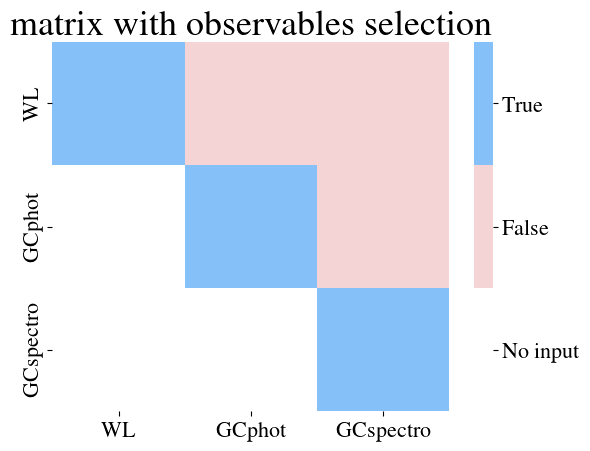

[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb
[model] *WARNING* Theories {camb.transfers, camb} do not appear to be actually used for anything
Time for initialization of the likelihood:  4.744693994522095


In [9]:
from cobaya.model import get_model

from cloe.auxiliary.likelihood_yaml_handler import set_halofit_version
set_halofit_version(info, info['likelihood']['Euclid']['NL_flag'])
# The `get_model` function of Cobaya imported in the line above needs a yaml or dictionary as an argument
# 
# We measure the time to give us an estimation of how much time it takes to make the initialization of the
# likelihood
t1 = time.time()

# Second: create an instance of the `model` wrapper called model
model = get_model(info)
print('Time for initialization of the likelihood: ', time.time()-t1)
# We need to sample the log posterior to create model.provider.params
logposterior = model.logposterior({})

In [10]:
# Create an instance of the class EuclidLikelihood and initialize it (general case)
like = EuclidLikelihood()
like.initialize()
like.passing_requirements(model, info, **model.provider.params)


[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb
[model] *WARNING* Theories {camb.transfers, camb} do not appear to be actually used for anything
[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb
[model] *WARNING* Theories {camb, camb.transfers} do not appear to be actually used for anything


[model] *WARNING* Ignored blocks/options: ['sampler', 'output', 'force']
[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb


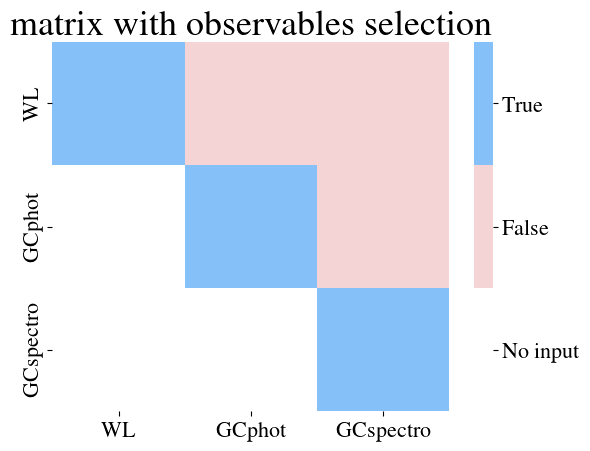

[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb
[model] *WARNING* Theories {camb.transfers, camb} do not appear to be actually used for anything


In [11]:
# New model with halofit
info['likelihood']['Euclid']['NL_flag']=1
set_halofit_version(info, info['likelihood']['Euclid']['NL_flag'])
model_1 = get_model(info)
logposterior = model_1.logposterior({})

In [12]:
# New instances of the class EuclidLikelihood with halofit

like_1 = EuclidLikelihood()
like_1.initialize()
like_1.passing_requirements(model_1, info, **model_1.provider.params)

[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb
[model] *WARNING* Theories {camb, camb.transfers} do not appear to be actually used for anything
[camb] `camb` module loaded successfully from /Users/pedro/miniconda3/envs/cloe/lib/python3.9/site-packages/camb
[model] *WARNING* Theories {camb, camb.transfers} do not appear to be actually used for anything


### Copy the cosmo dictionary and produce a new one without IA

In [13]:
# This is just the scale at which to get the growth factor, it is used as an input for update_cosmo_dic
wavenumber_growth = 0.05

# The case NL_flag=1 is special, because it needs the different initializations of like and model
like_1.cosmo.cosmo_dic['NL_flag'] = 1
like_1.cosmo.update_cosmo_dic(like_1.cosmo.cosmo_dic['z_win'], wavenumber_growth)
cosmo_dic_1 = copy.copy(like_1.cosmo.cosmo_dic)

like_1.cosmo.cosmo_dic['NL_flag'] = 1
like_1.cosmo.cosmo_dic['nuisance_parameters']['aia'] = 0.
like_1.cosmo.update_cosmo_dic(like_1.cosmo.cosmo_dic['z_win'], wavenumber_growth)
cosmo_dic_2 = copy.copy(like_1.cosmo.cosmo_dic)

In [14]:
## Choose k-array for plots
wavenumbers=np.logspace(-3, 1, 200)

In [15]:
## Obtain set of defined redshift range

like.cosmo.cosmo_dic['z_win']

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

In [16]:
## Choose a set of z's to plot

redshift_chosen = [like.cosmo.cosmo_dic['z_win'][ii] for ii in [0,10,37,50]]
redshift_chosen

[0.0, 0.4040404040404041, 1.494949494949495, 2.0202020202020203]

### Plot the spectra with and without IA

In [17]:
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap

In [18]:
## Define a color palette for the plots
name = "Dark2"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors

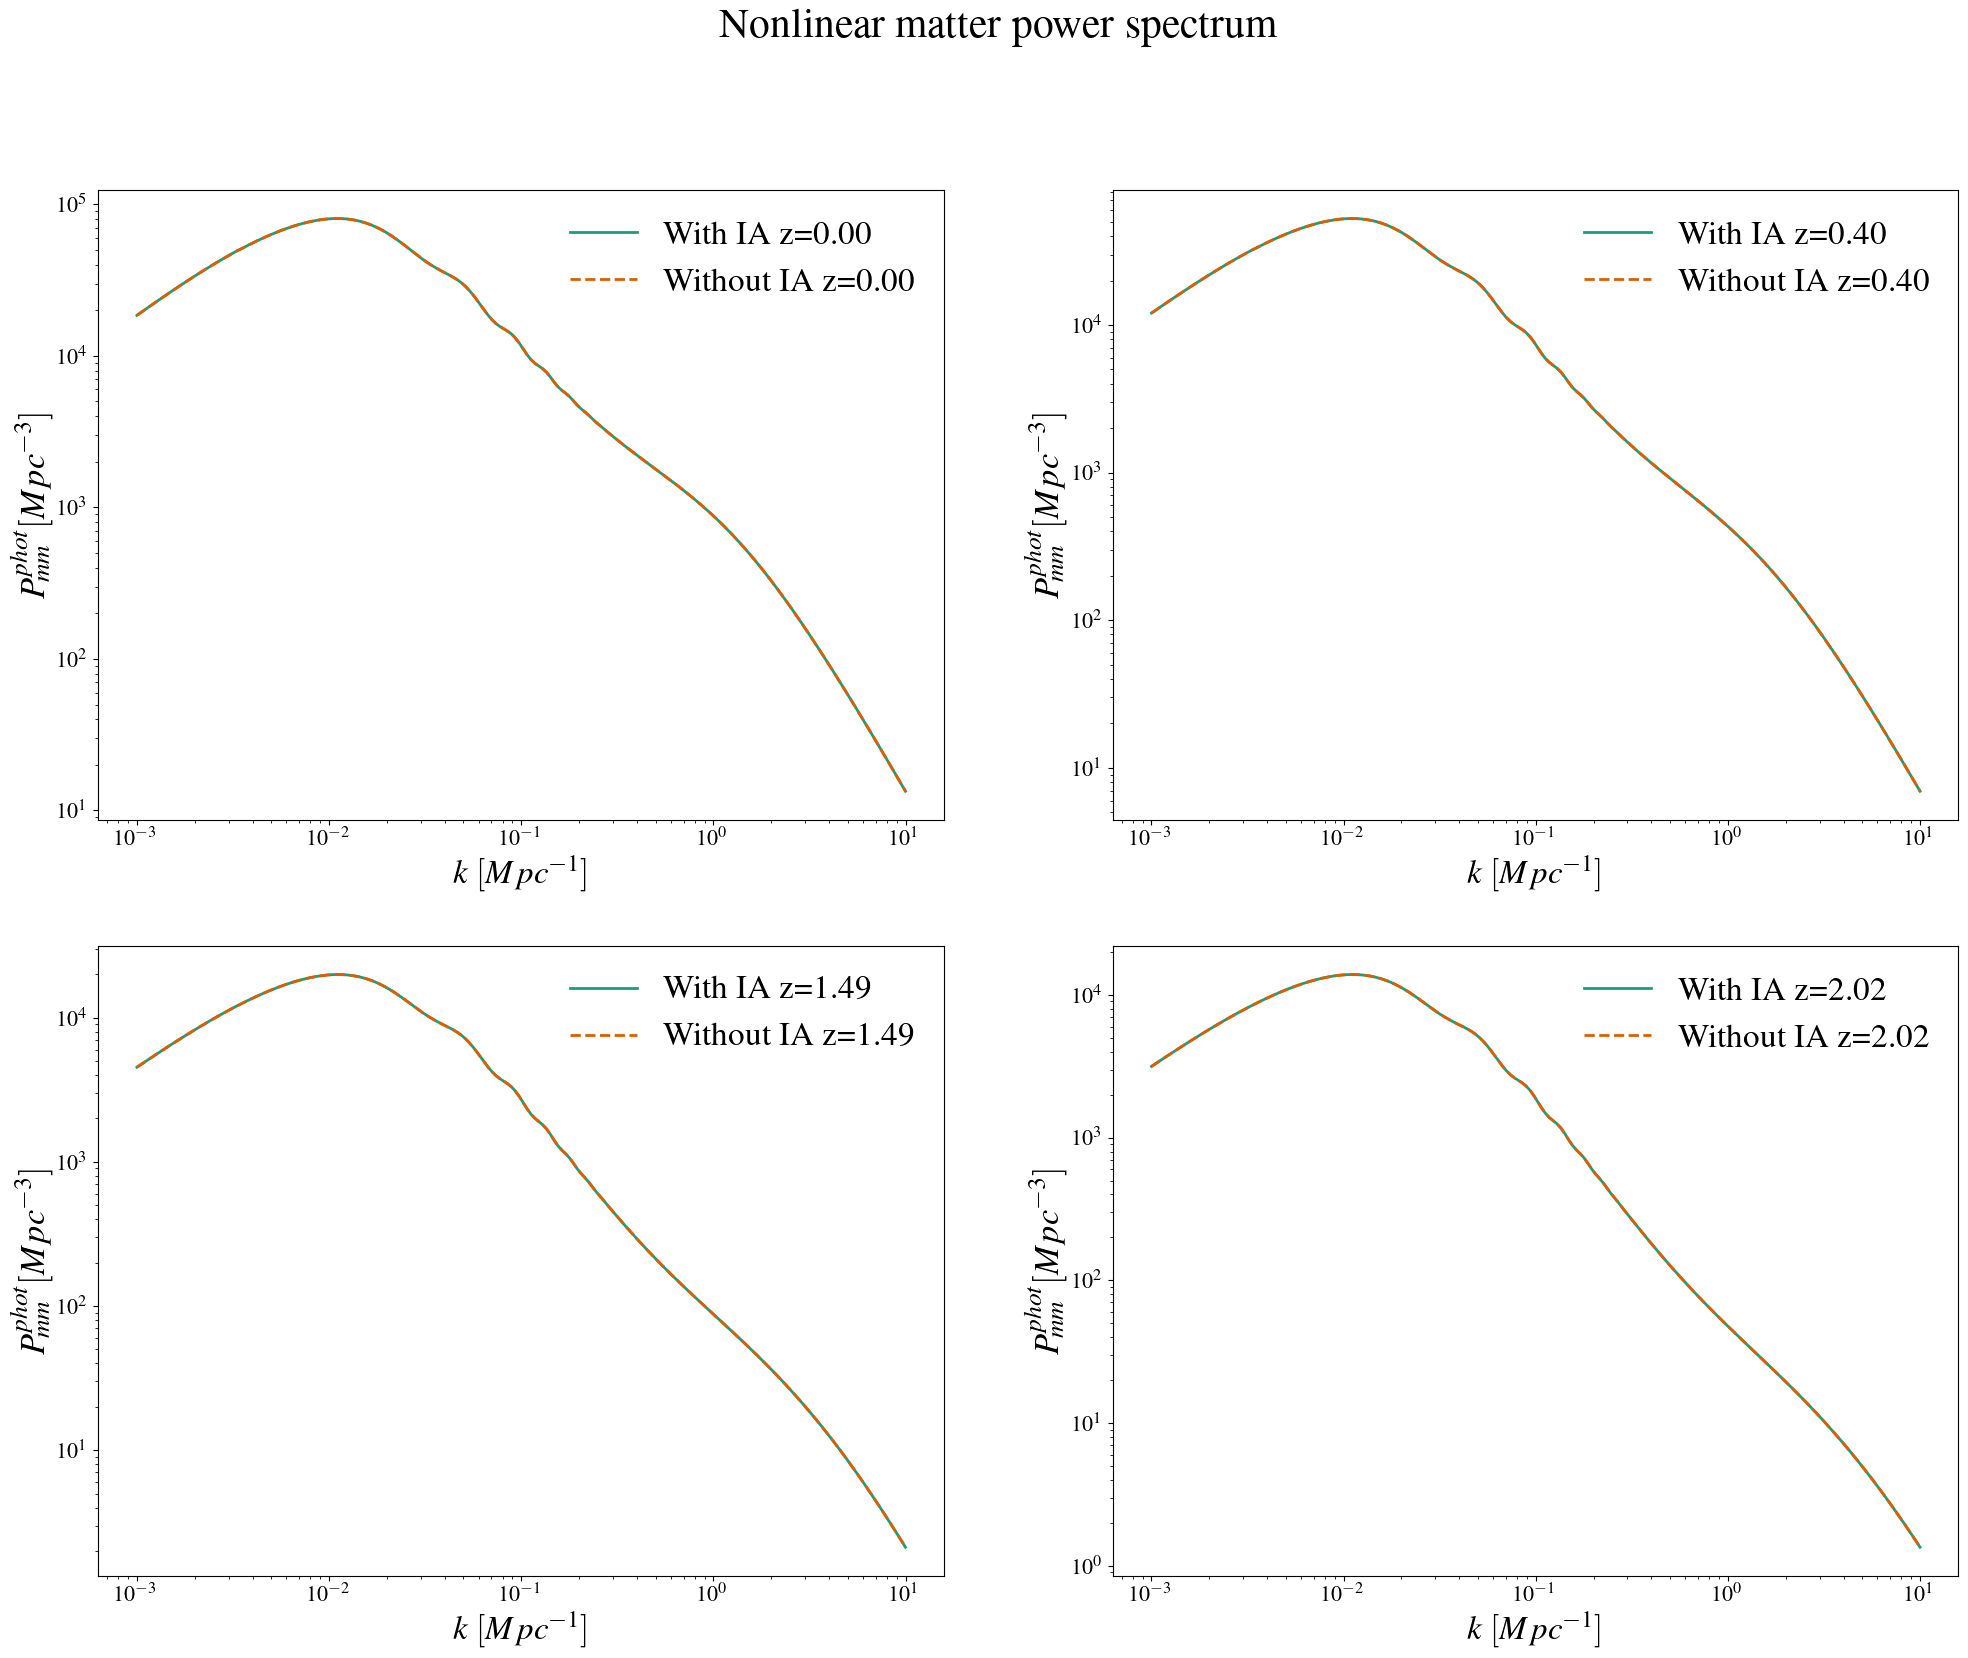

In [19]:
## Create four panels, one for each of the chosen redshifts above

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Nonlinear matter power spectrum')

ax=axs[0,0]

Pab = 'Pmm_phot'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]

    ax.loglog(wavenumbers, cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '-', 
               label=r"With IA z={:.2f}".format(redshift0), c=colors[0])

    
    ax.loglog(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"Without IA z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'$P_{mm}^{phot} [{Mpc}^{-3}]$')
    ax.legend(frameon=False, fontsize=24)

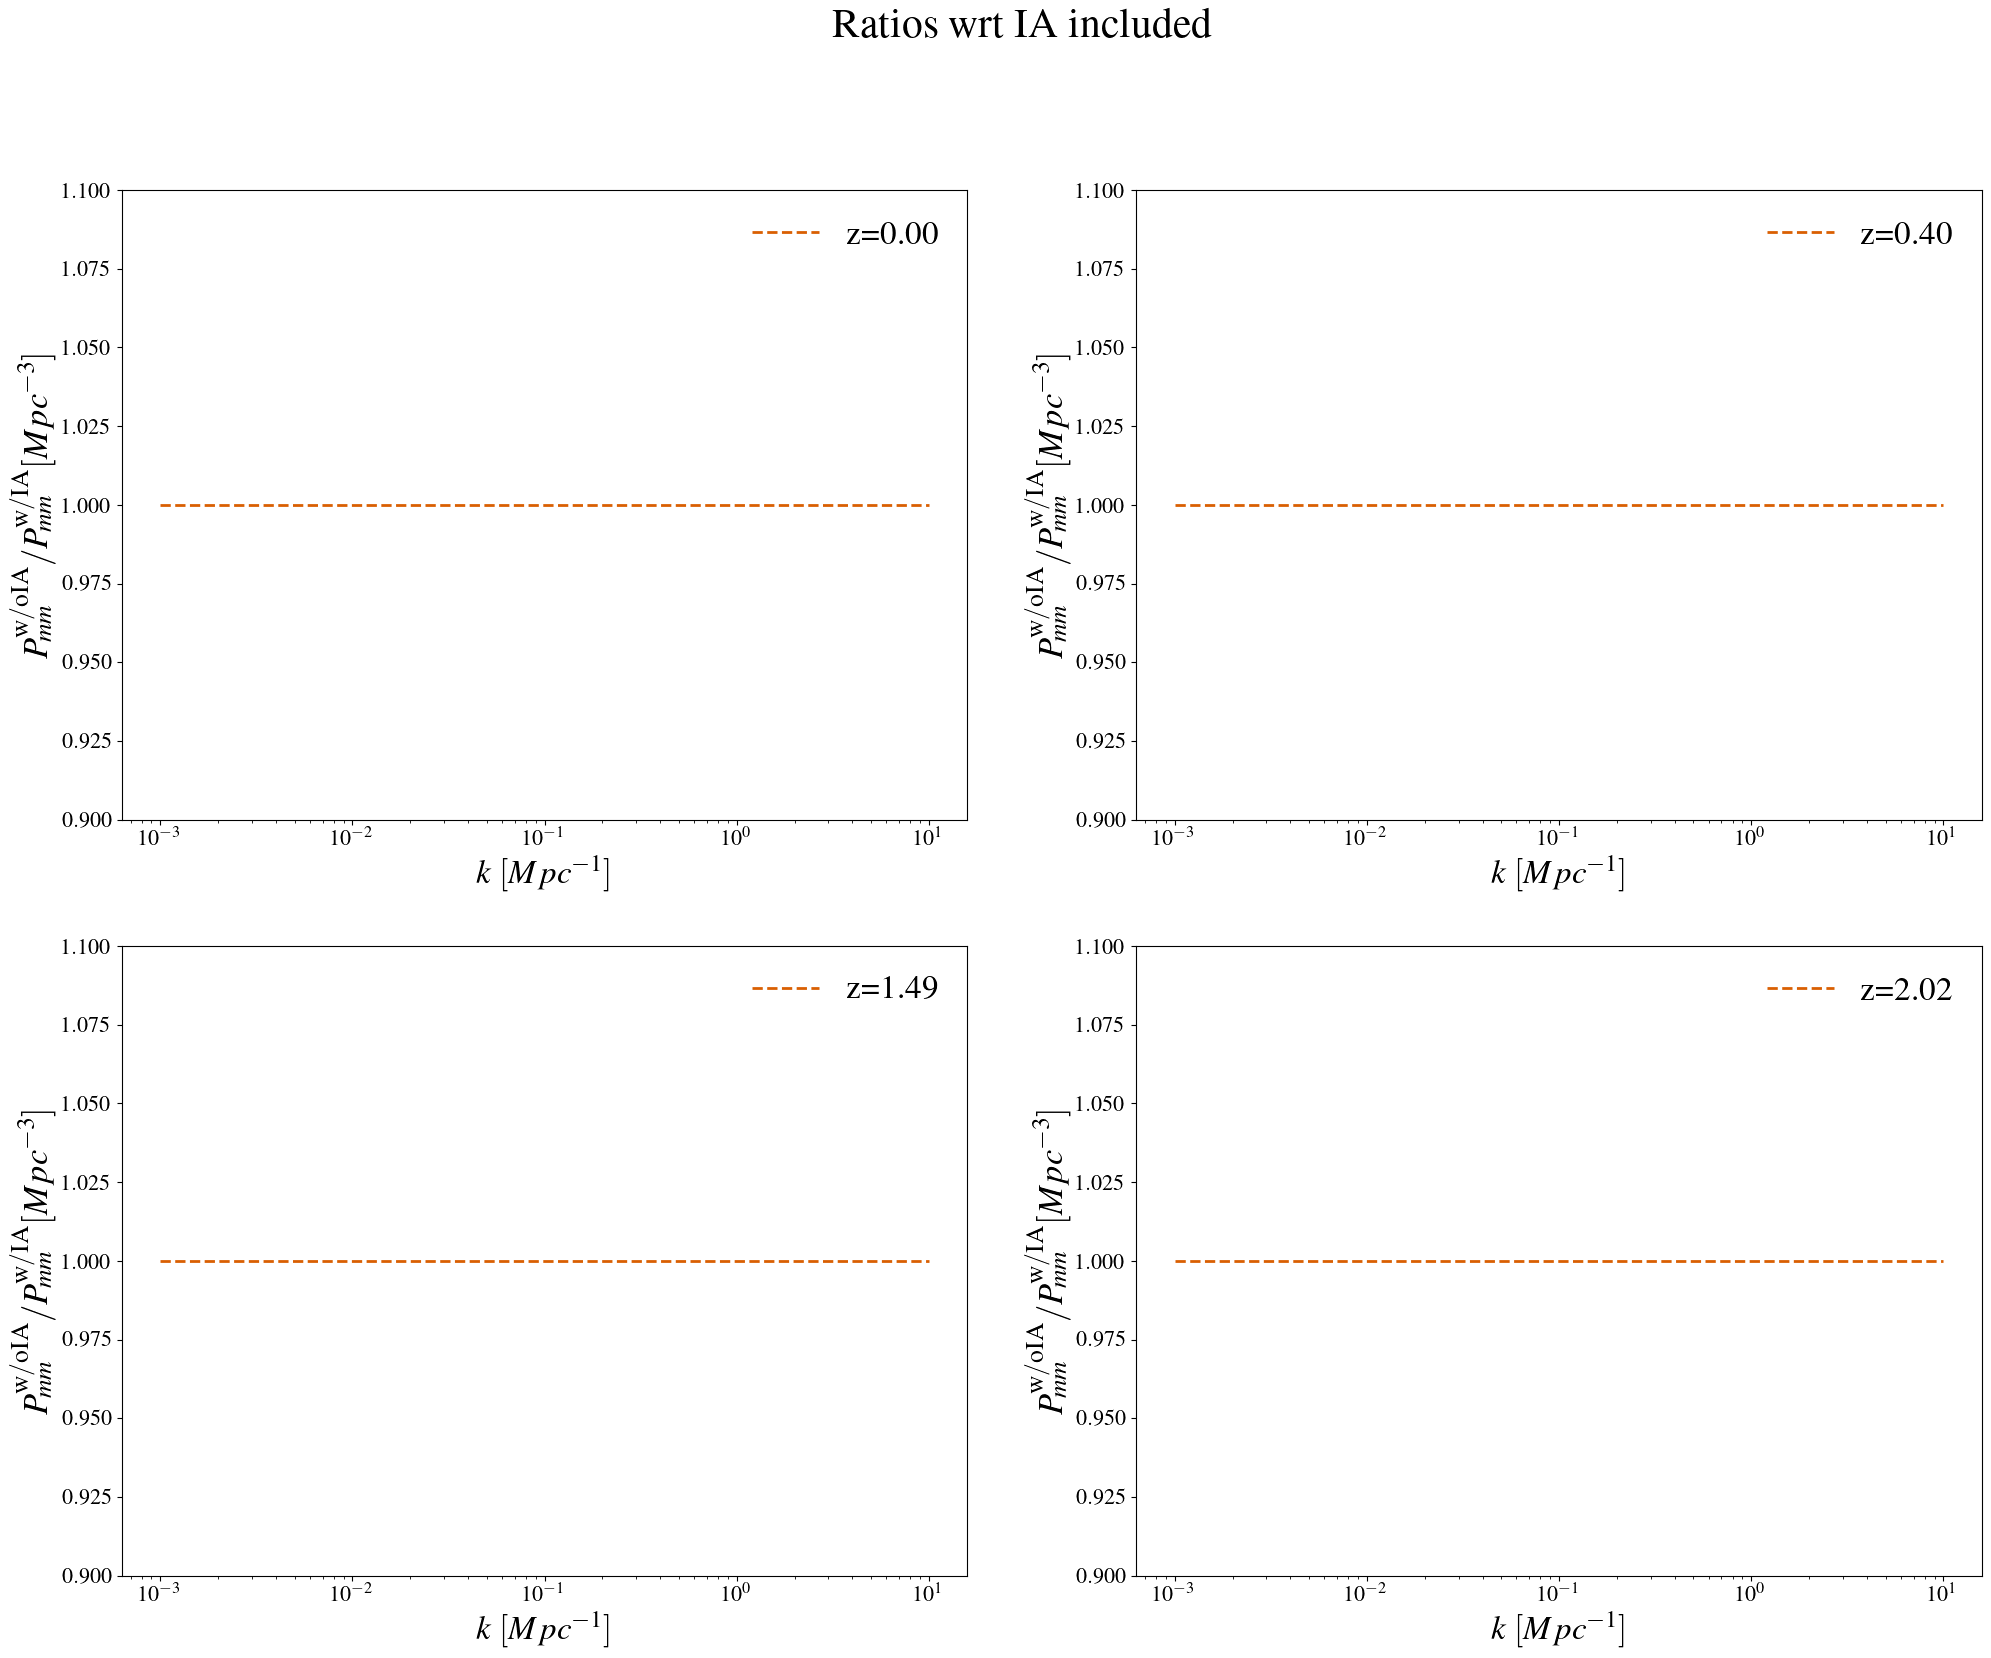

In [20]:
## Now the ratios

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Ratios wrt IA included')

ax=axs[0,0]

Pab = 'Pmm_phot'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]
    
    #---
    
    ax.semilogx(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten()/cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'$P_{mm}^{\rm w/o IA}/P_{mm}^{\rm w/ IA} [{Mpc}^{-3}]$')
    
    ax.set_ylim([0.9,1.1])
    
    ax.legend(frameon=False, fontsize=24)

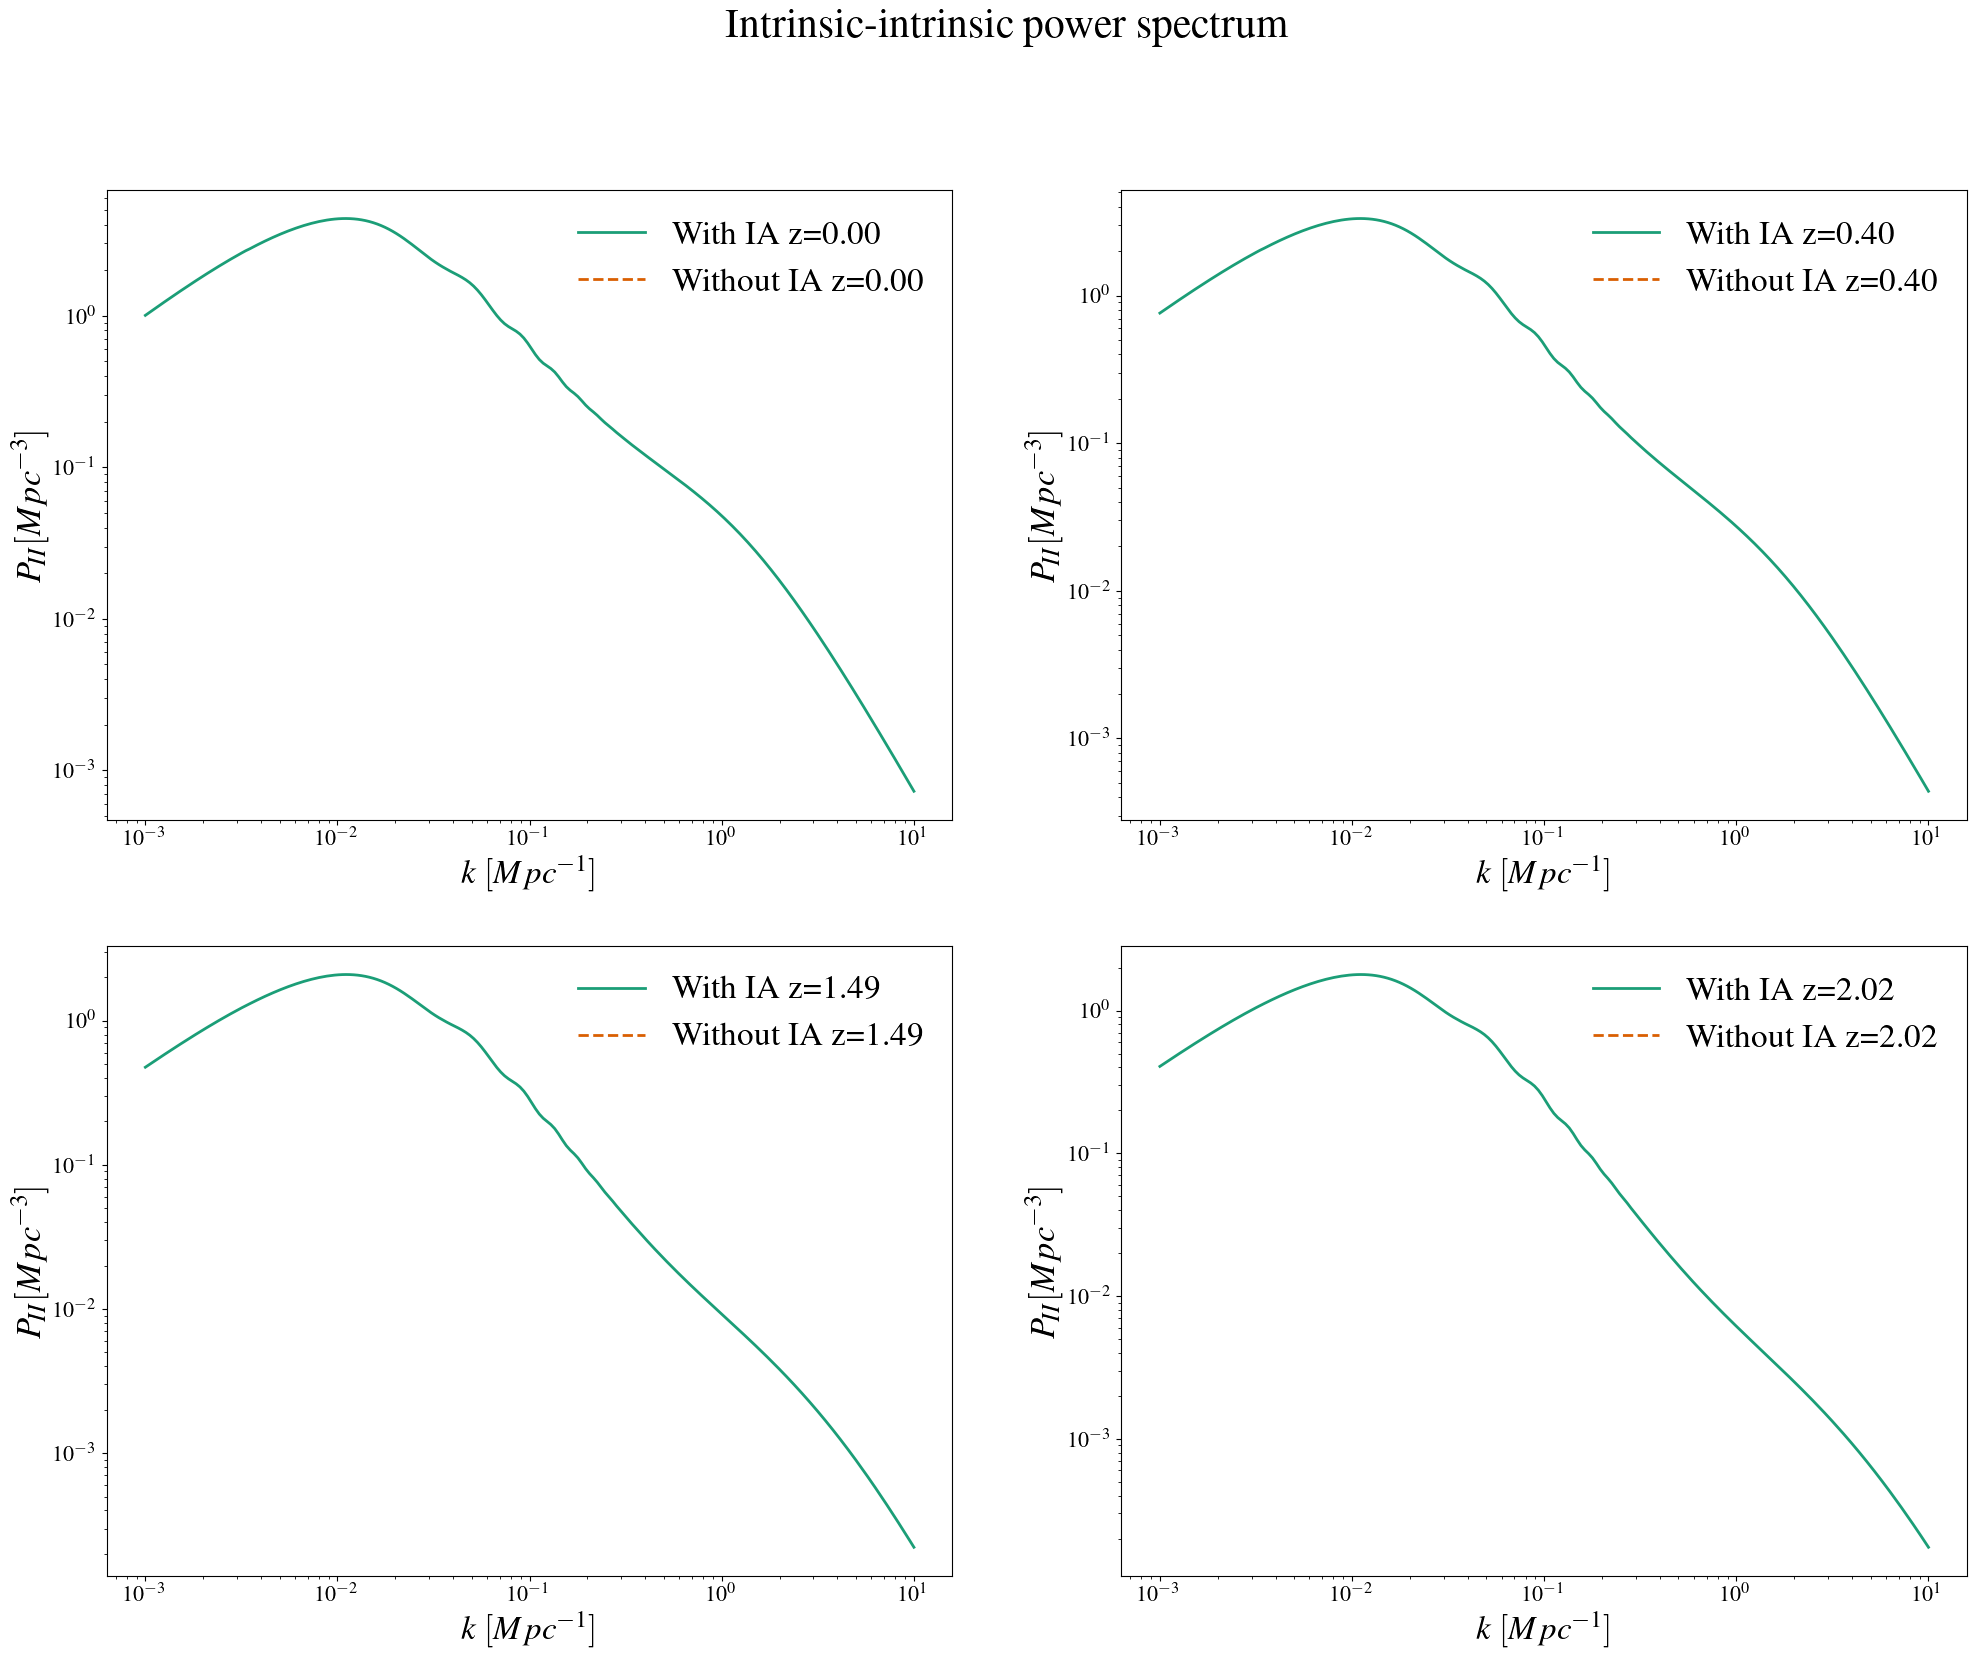

In [21]:
## Create four panels, one for each of the chosen redshifts above

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Intrinsic-intrinsic power spectrum')

ax=axs[0,0]

Pab = 'Pii'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]

    ax.loglog(wavenumbers, cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '-', 
               label=r"With IA z={:.2f}".format(redshift0), c=colors[0])

    
    ax.loglog(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"Without IA z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'$P_{II} [{Mpc}^{-3}]$')
    ax.legend(frameon=False, fontsize=24)

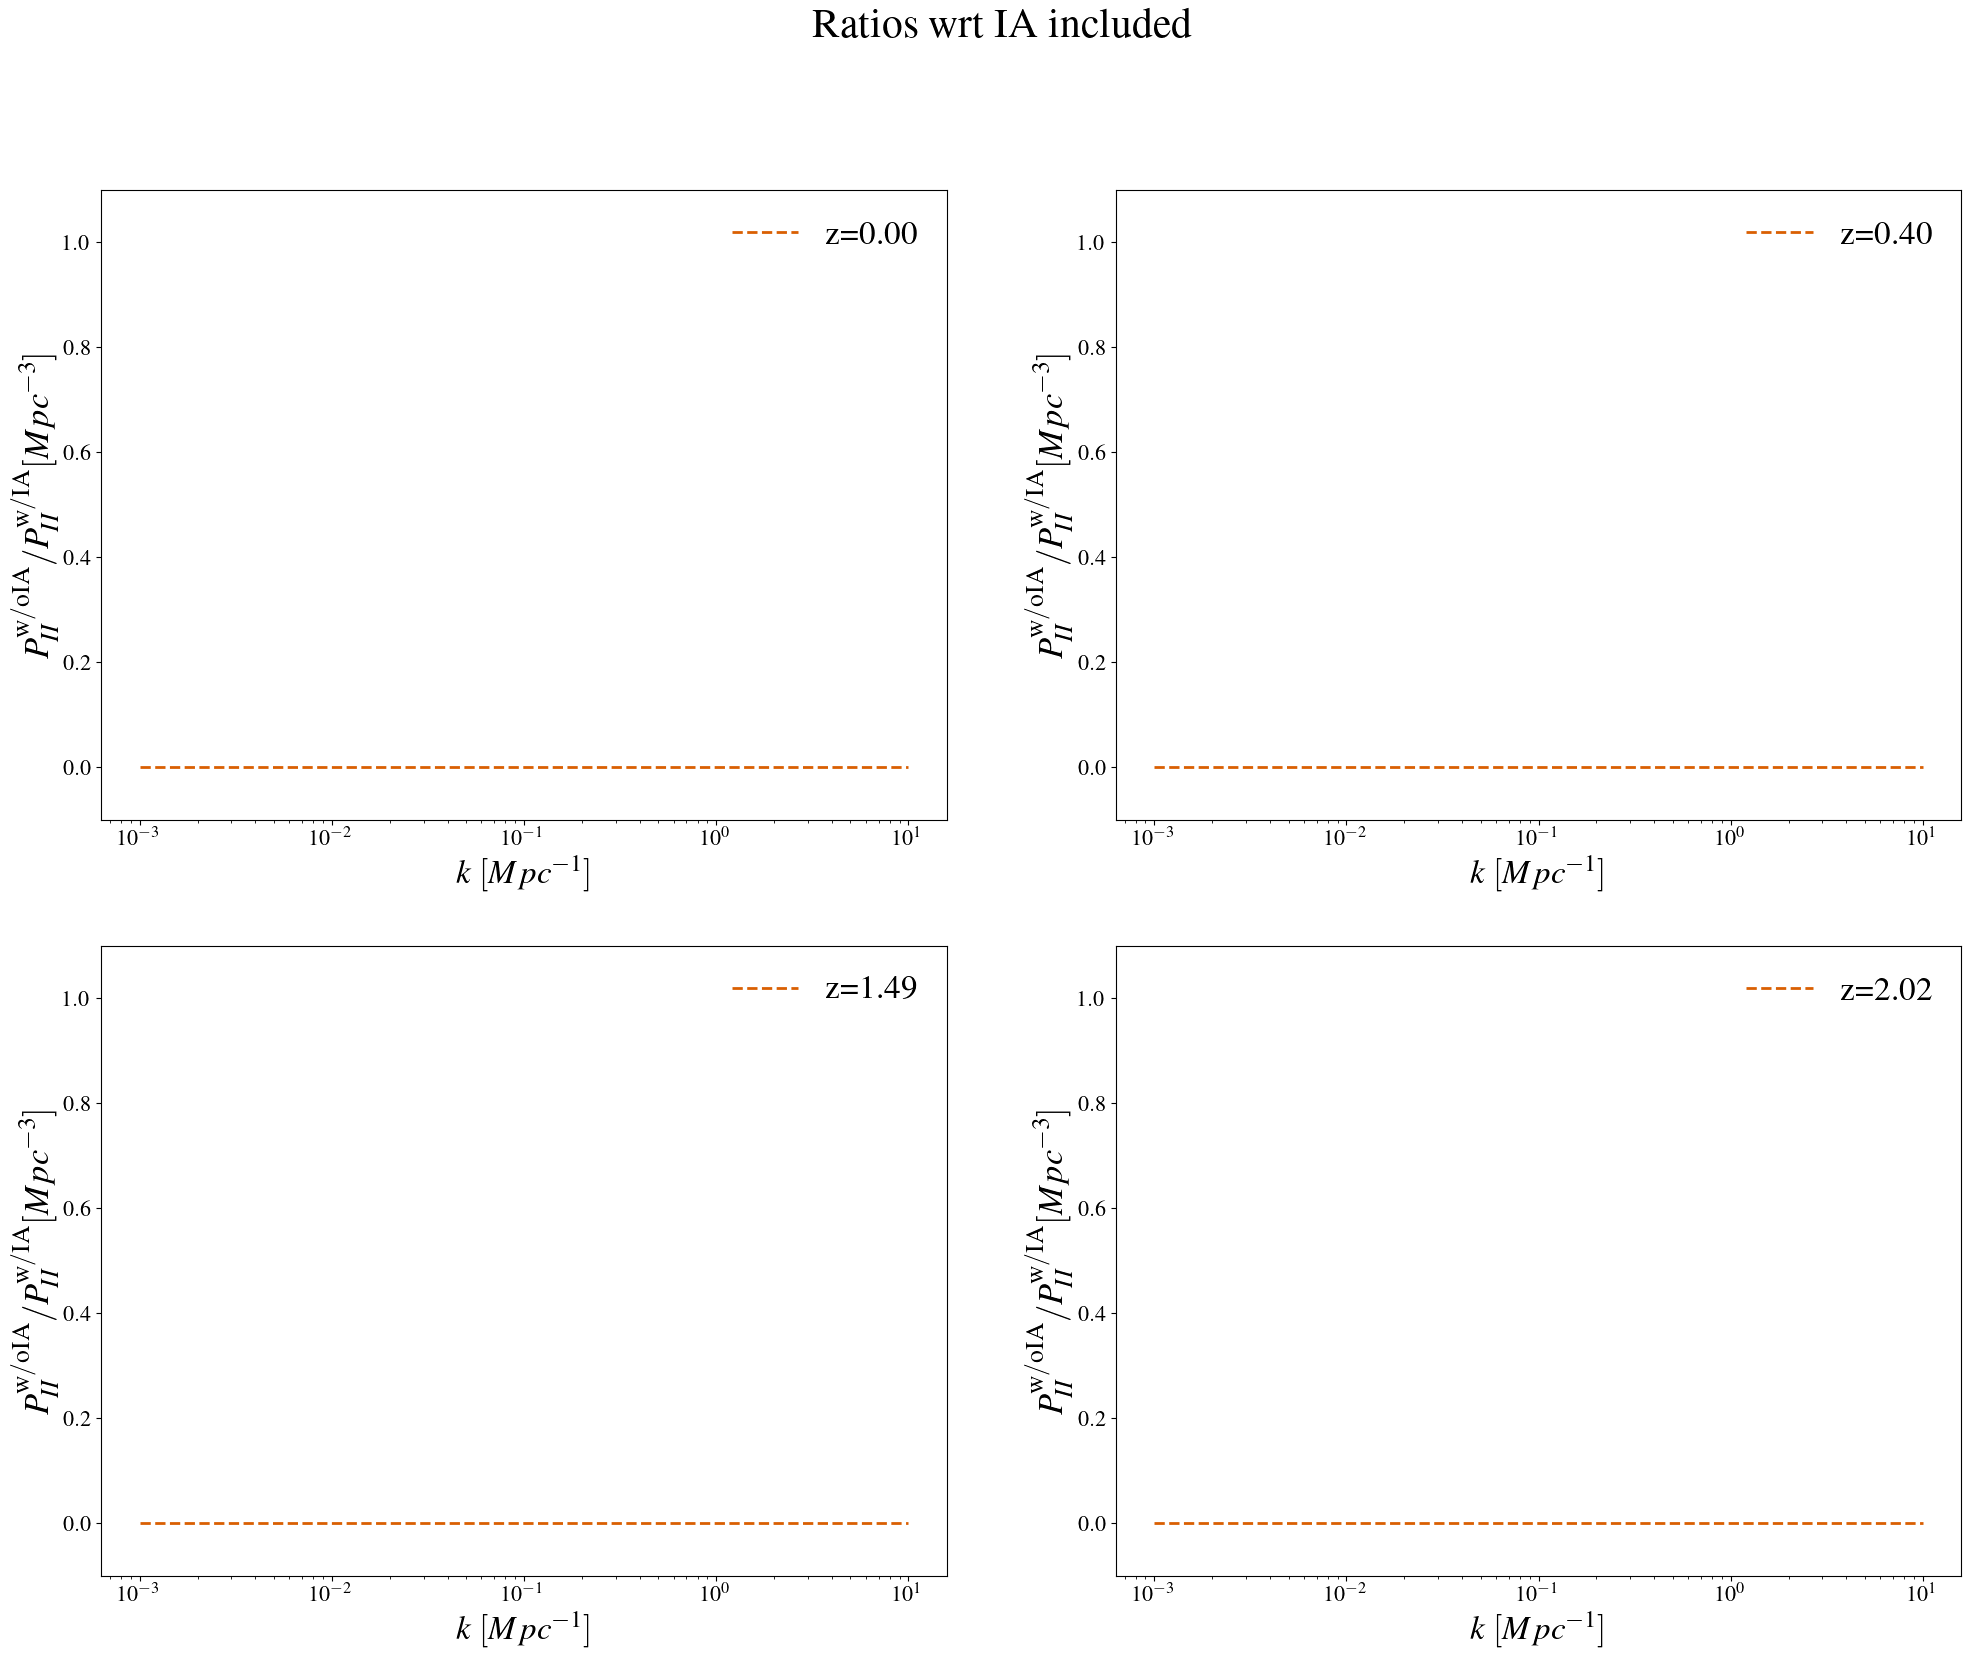

In [22]:
## Now the ratios

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Ratios wrt IA included')

ax=axs[0,0]

Pab = 'Pii'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]
    
    #---
    
    ax.semilogx(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten()/cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'$P_{II}^{\rm w/o IA}/P_{II}^{\rm w/ IA} [{Mpc}^{-3}]$')
    
    ax.set_ylim([-0.1,1.1])
    
    ax.legend(frameon=False, fontsize=24)

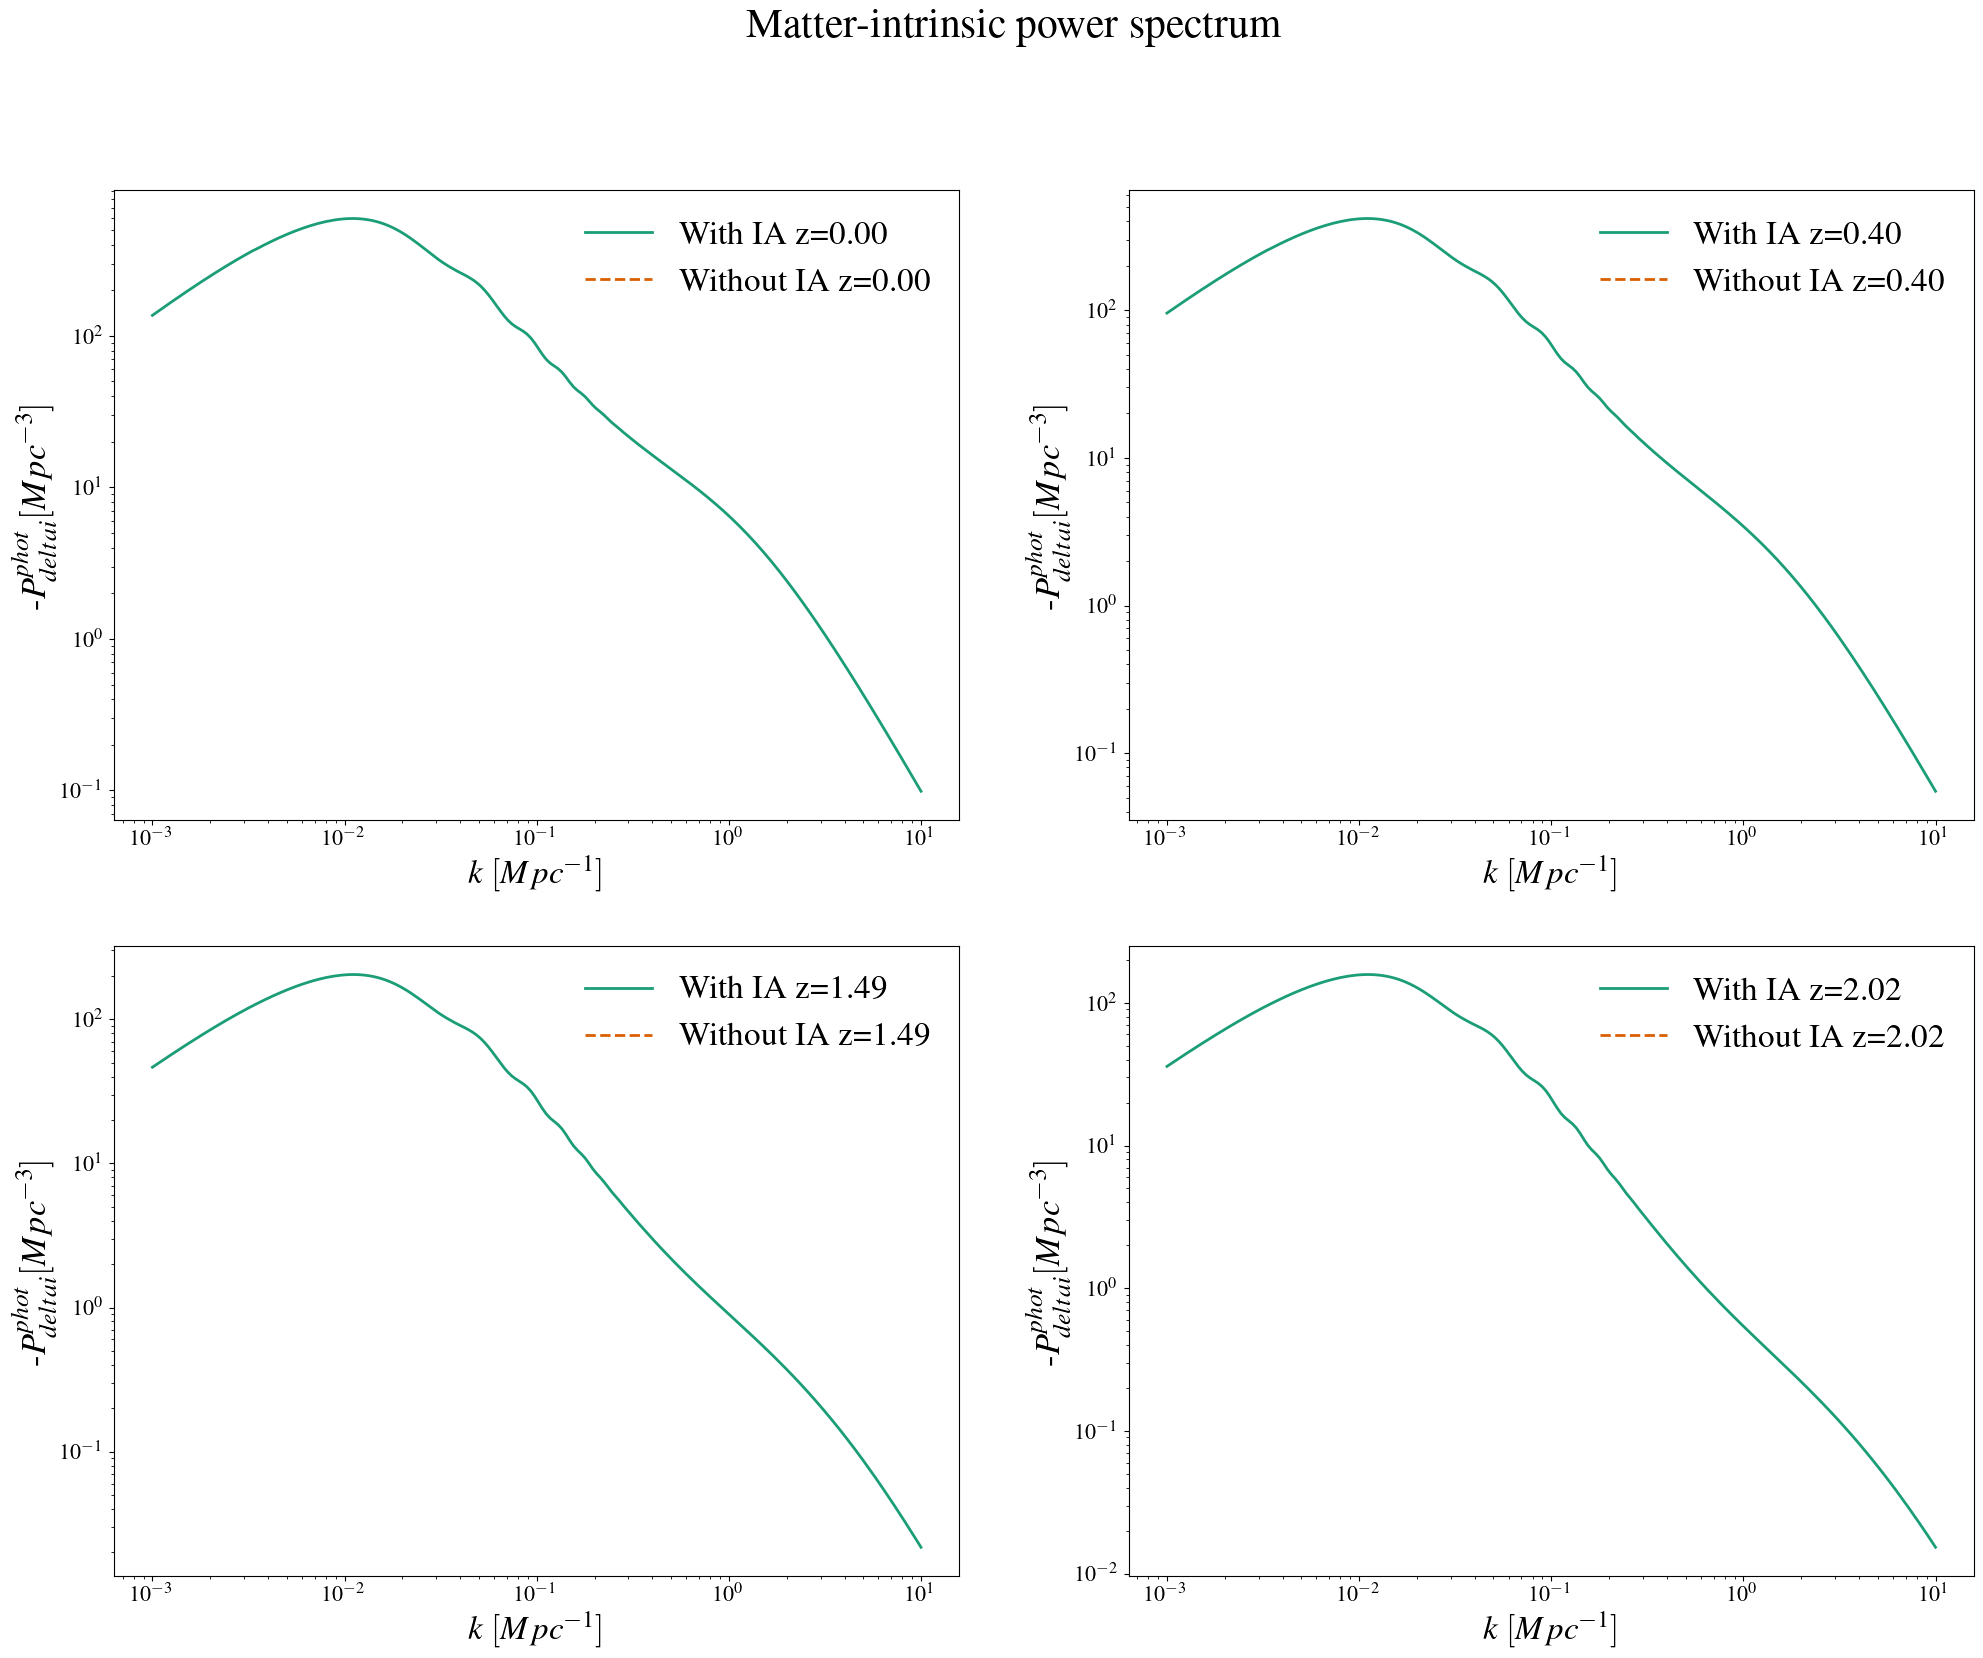

In [23]:
## Create four panels, one for each of the chosen redshifts above

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Matter-intrinsic power spectrum')

ax=axs[0,0]

Pab = 'Pdeltai'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]

    ax.loglog(wavenumbers, -cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '-', 
               label=r"With IA z={:.2f}".format(redshift0), c=colors[0])

    
    ax.loglog(wavenumbers, -cosmo_dic_2[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"Without IA z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'-$P_{deltai}^{phot} [{Mpc}^{-3}]$')
    ax.legend(frameon=False, fontsize=24)

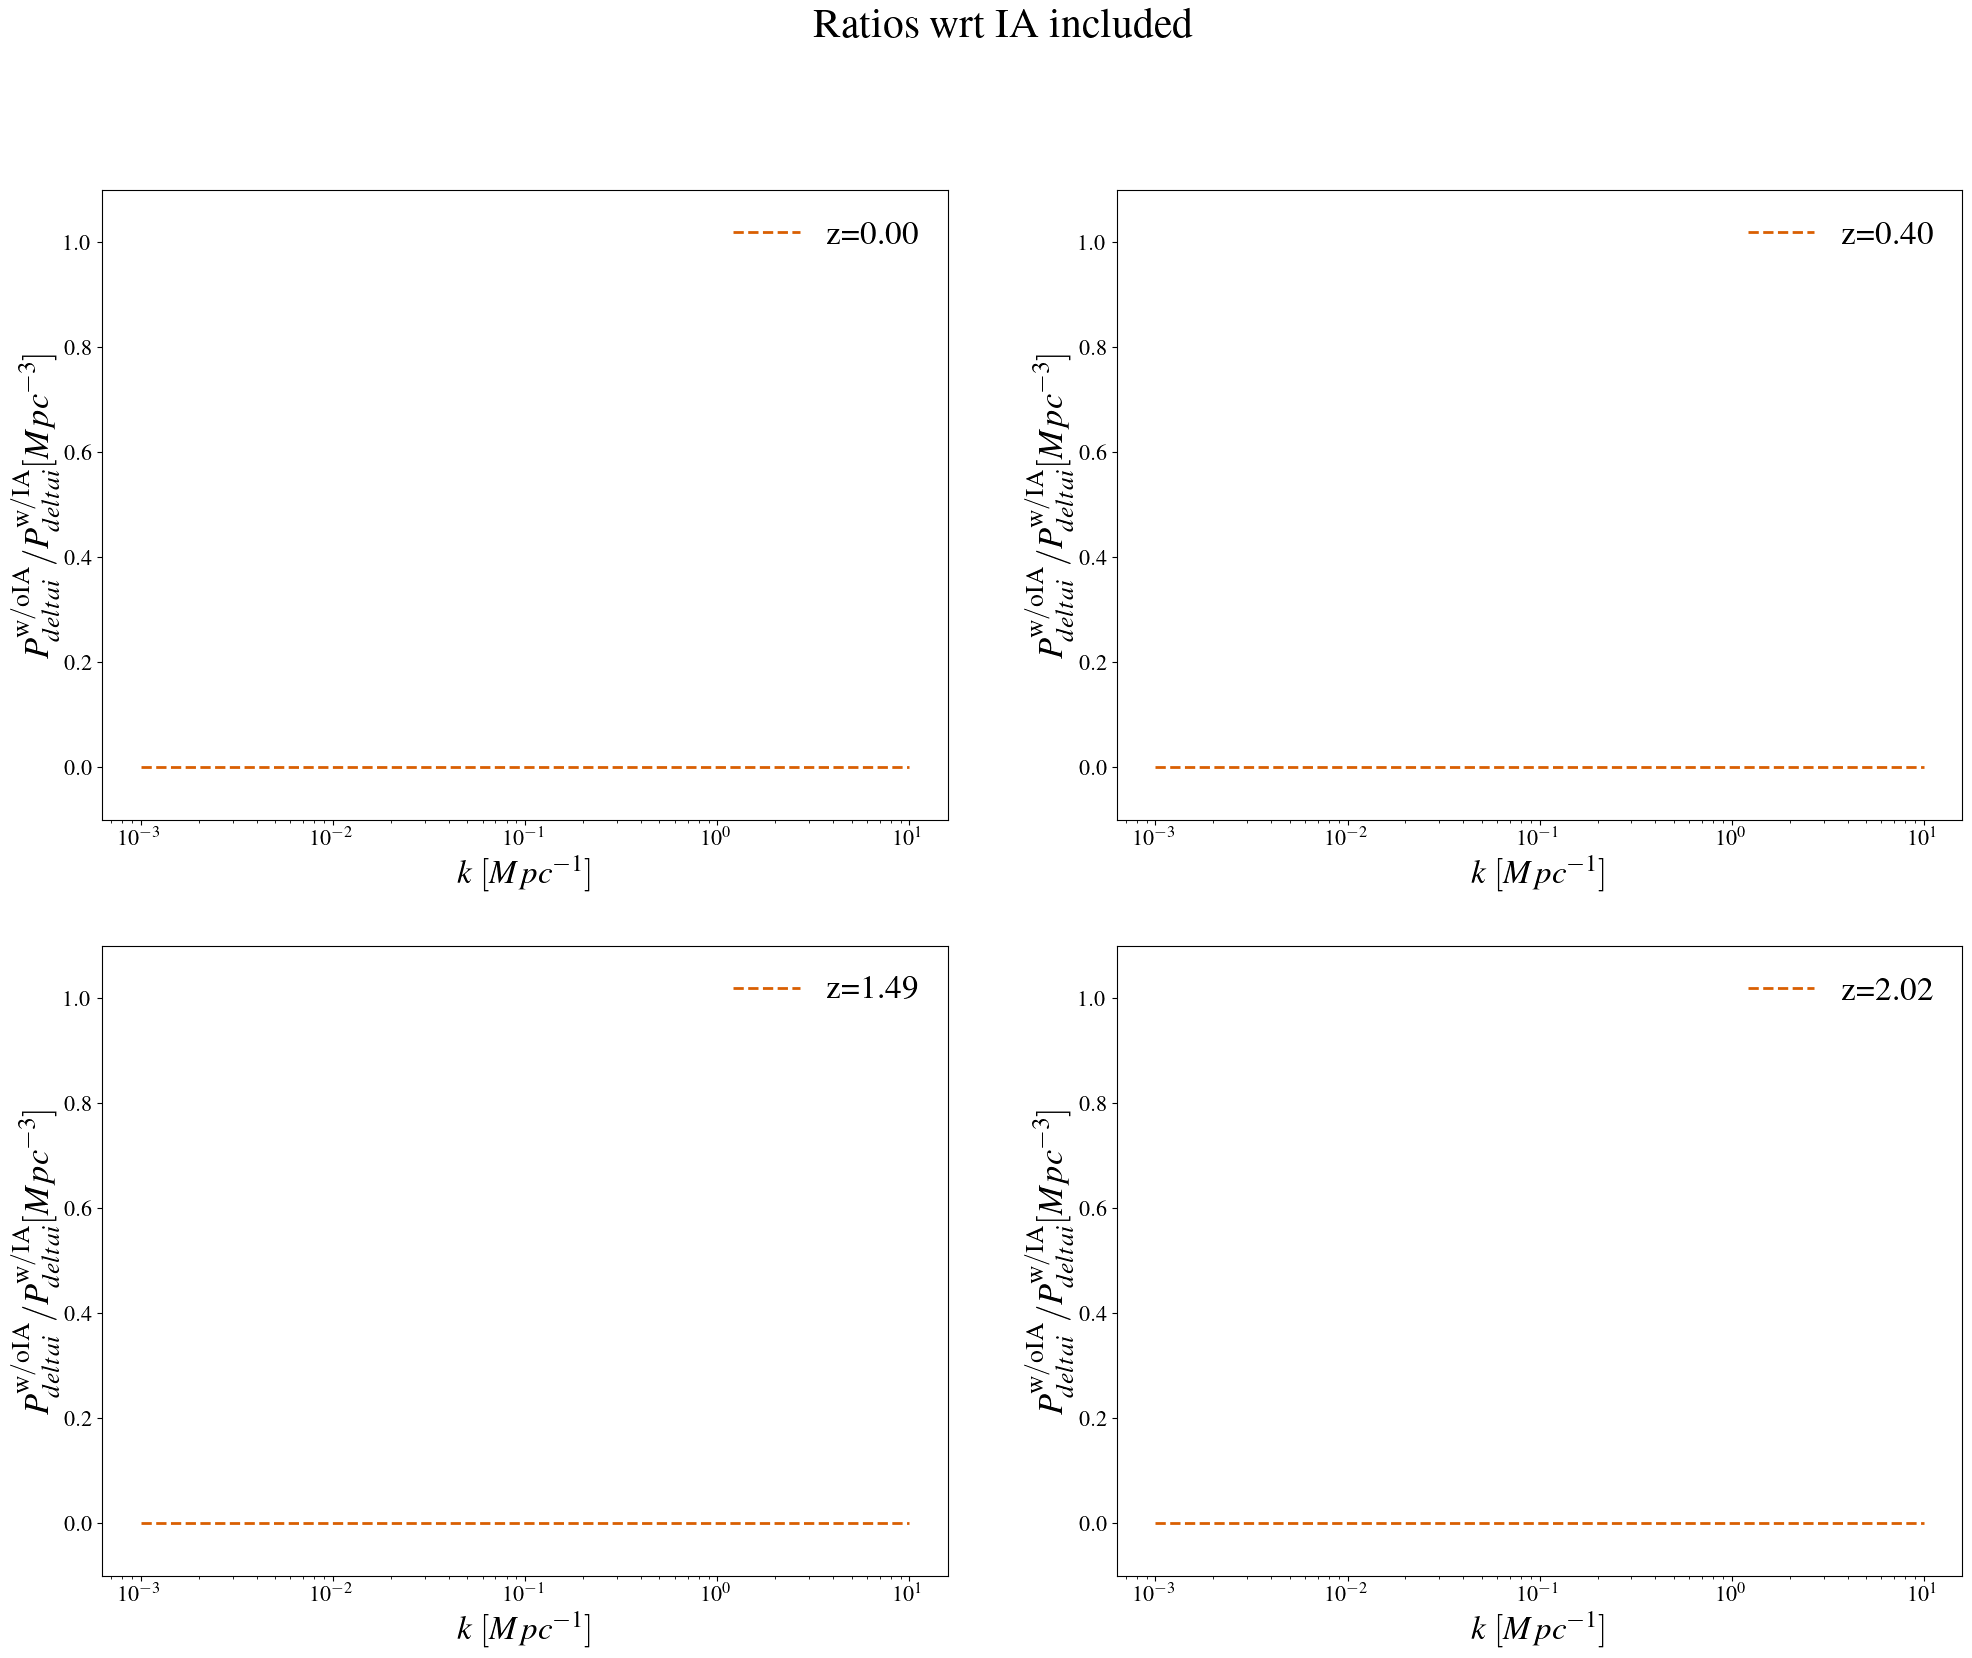

In [24]:
## Now the ratios

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Ratios wrt IA included')

ax=axs[0,0]

Pab = 'Pdeltai'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]
    
    #---
    
    ax.semilogx(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten()/cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'$P_{deltai}^{\rm w/o IA}/P_{deltai}^{\rm w/ IA} [{Mpc}^{-3}]$')
    
    ax.set_ylim([-0.1,1.1])
    
    ax.legend(frameon=False, fontsize=24)

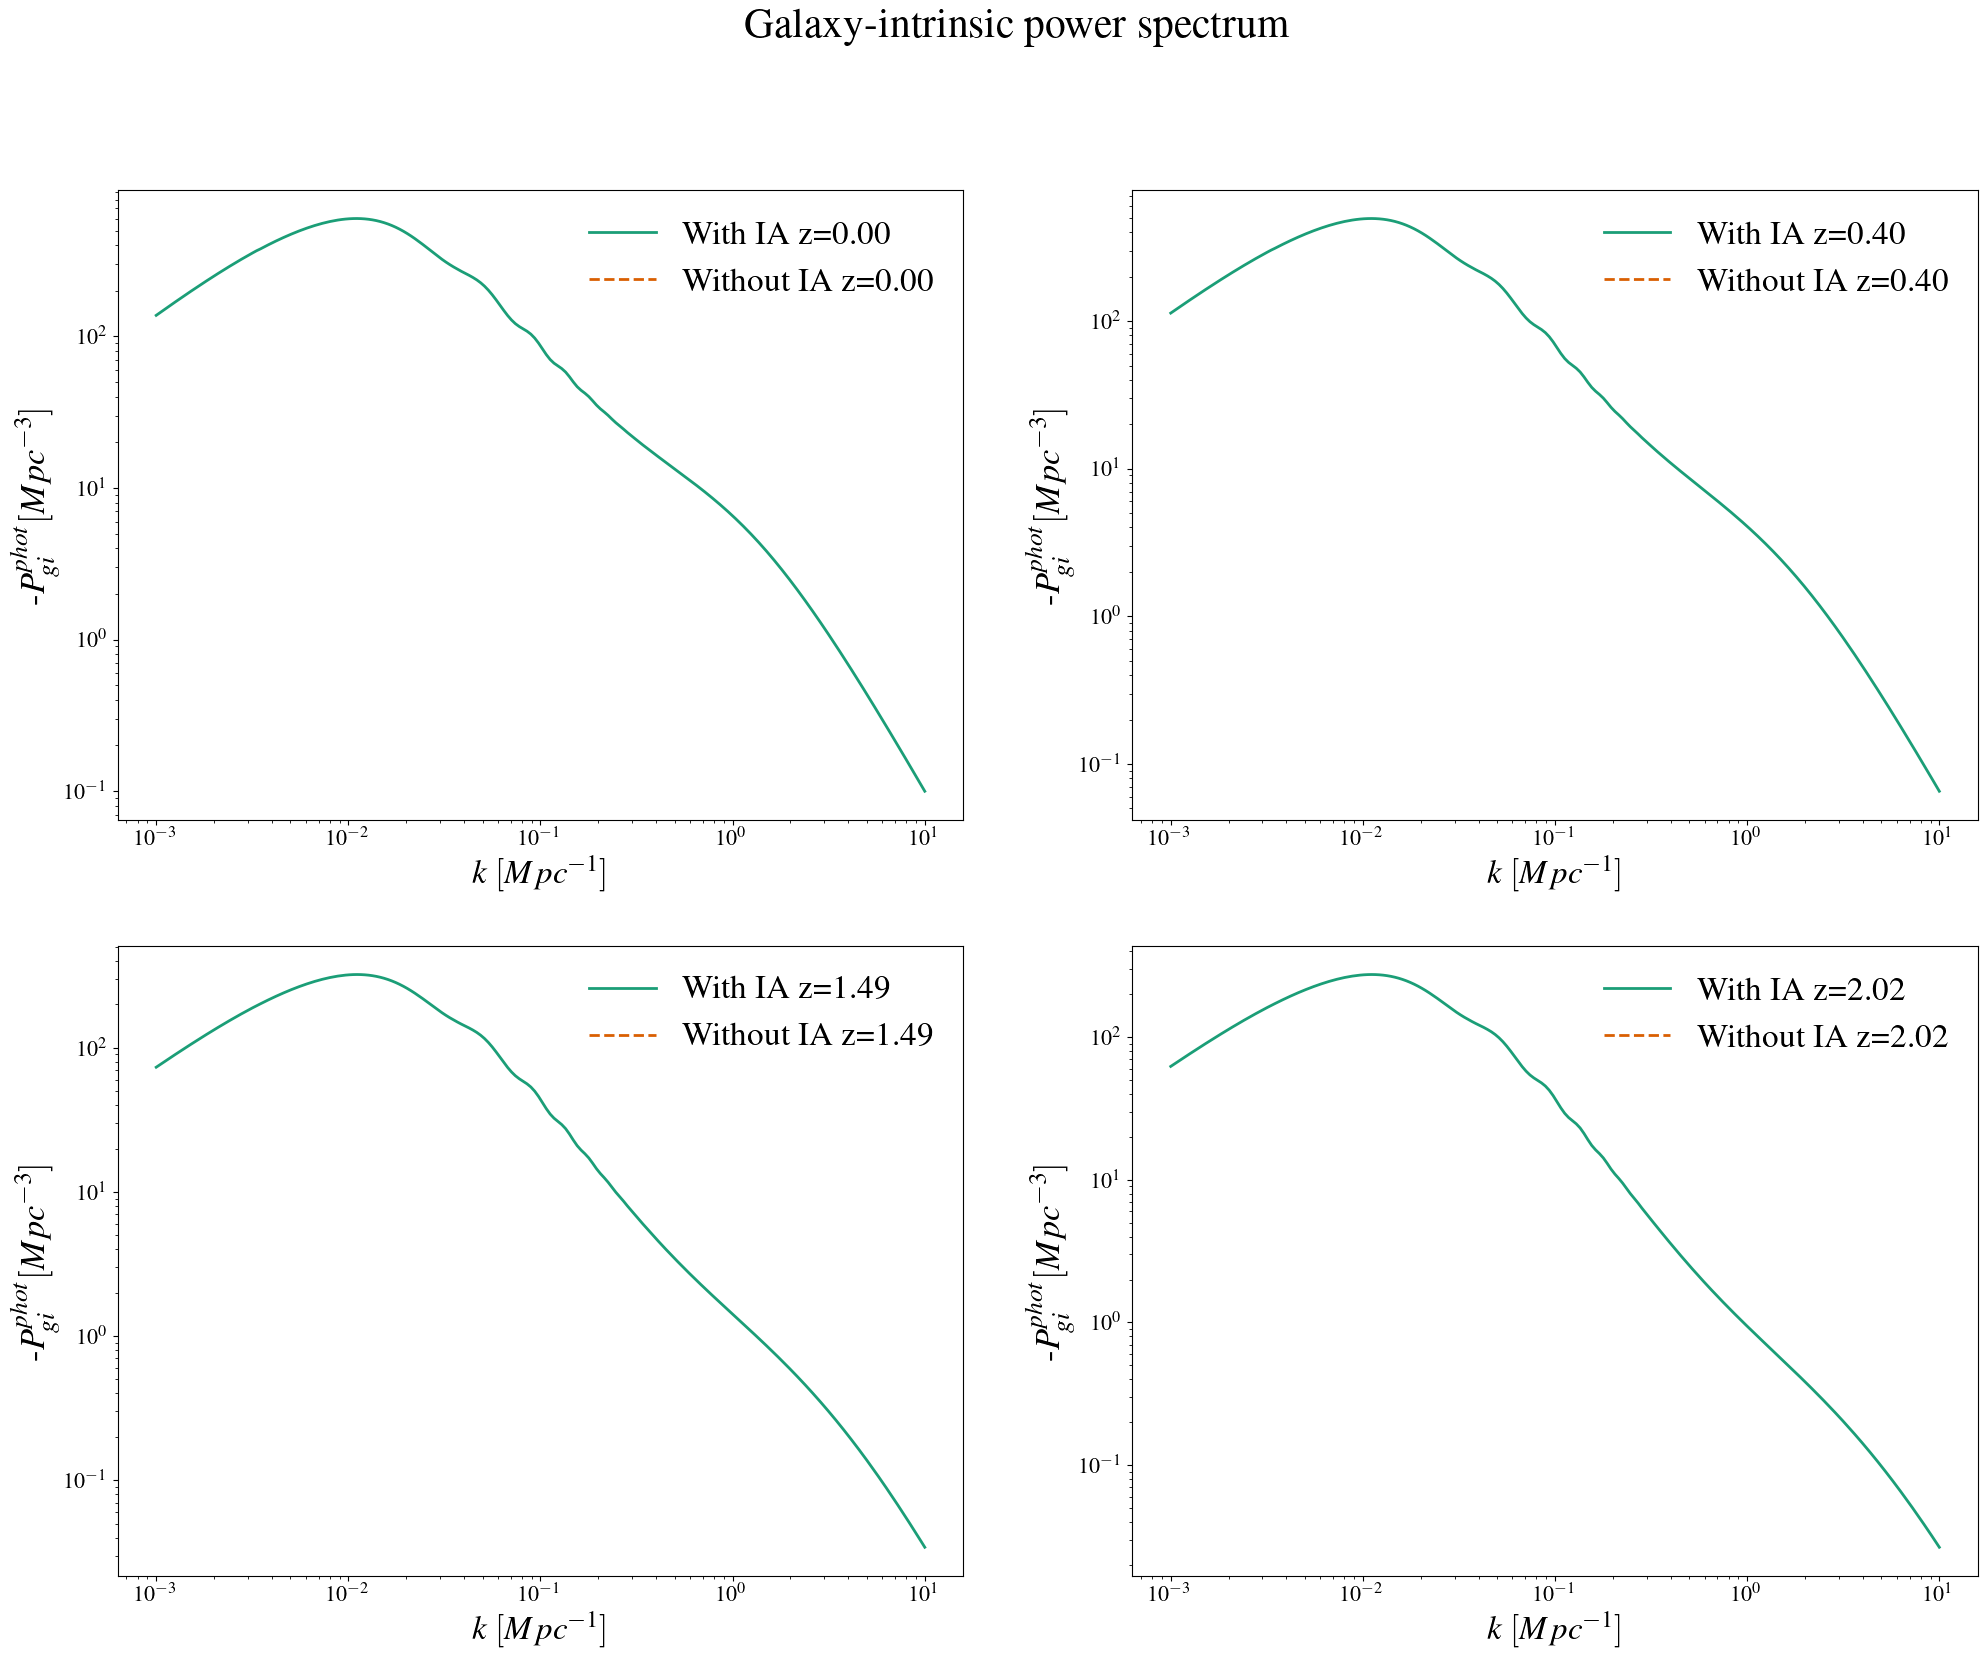

In [25]:
## Create four panels, one for each of the chosen redshifts above

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Galaxy-intrinsic power spectrum')

ax=axs[0,0]

Pab = 'Pgi_phot'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]

    ax.loglog(wavenumbers, -cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '-', 
               label=r"With IA z={:.2f}".format(redshift0), c=colors[0])

    
    ax.loglog(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"Without IA z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'-$P_{gi}^{phot} [{Mpc}^{-3}]$')
    ax.legend(frameon=False, fontsize=24)

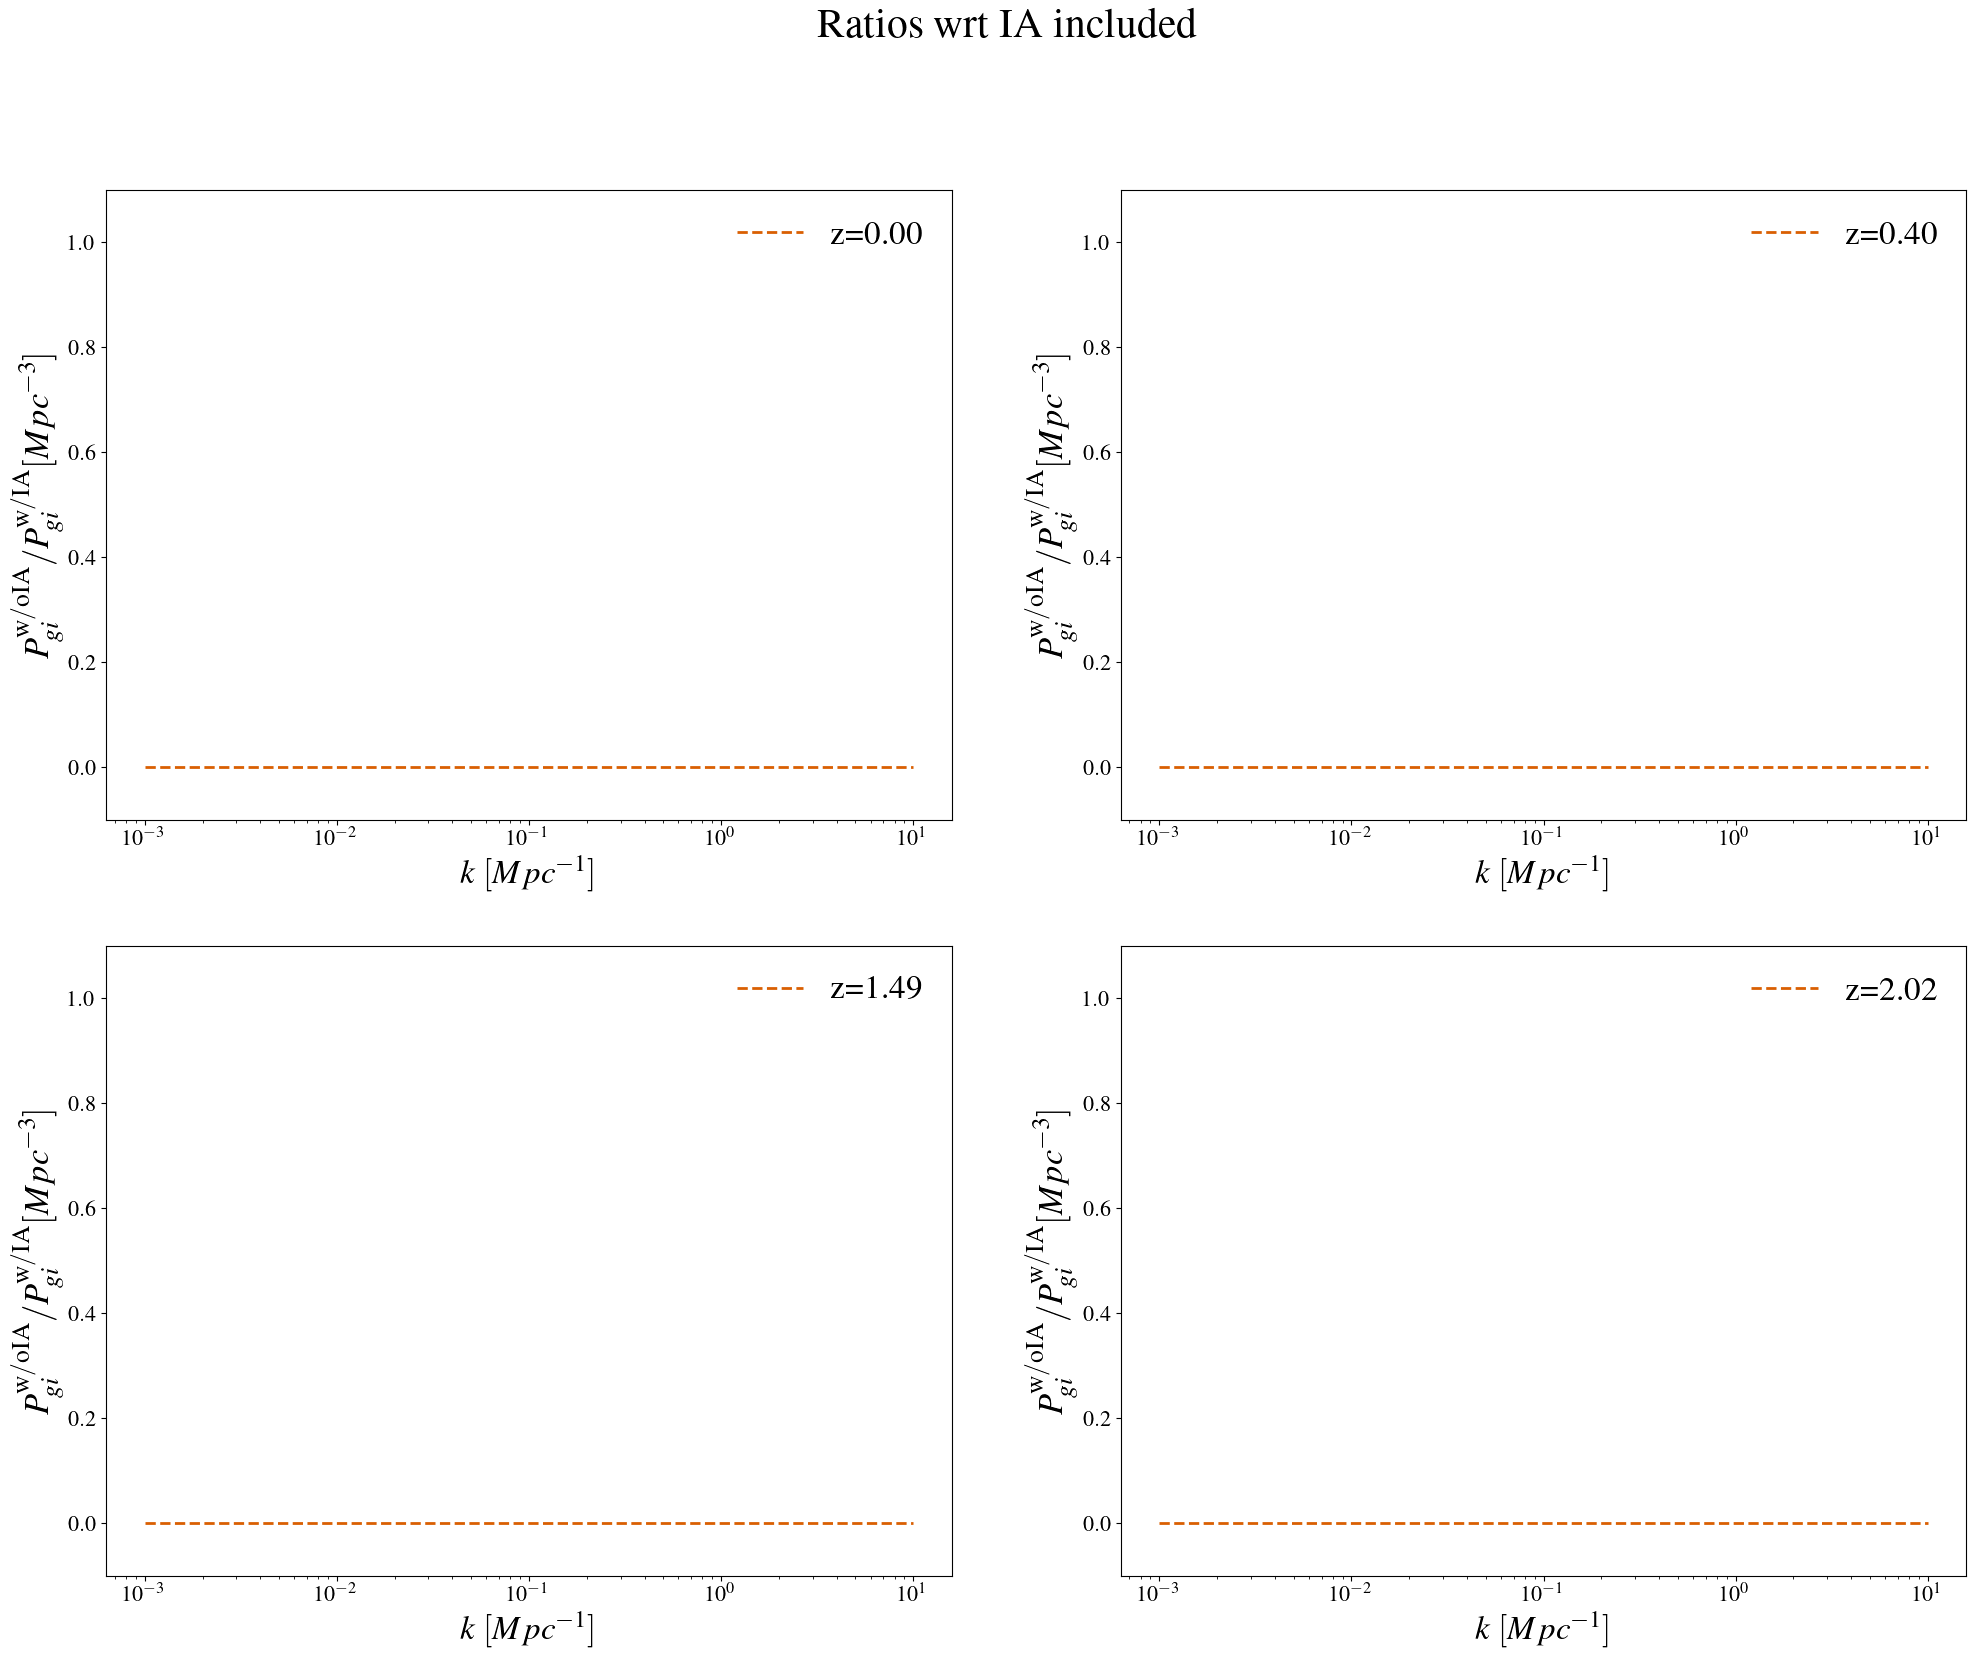

In [26]:
## Now the ratios

fig, axs = plt.subplots(2, 2, figsize=(24,18))
fig.suptitle('Ratios wrt IA included')

ax=axs[0,0]

Pab = 'Pgi_phot'


for iz in range(4):
    if iz==0:
        ax=axs[0,0]
    if iz==1:
        ax=axs[0,1]
    if iz==2:
        ax=axs[1,0]
    if iz==3:
        ax=axs[1,1]
    redshift0=redshift_chosen[iz]
    
    #---
    
    ax.semilogx(wavenumbers, cosmo_dic_2[Pab](redshift0, wavenumbers).flatten()/cosmo_dic_1[Pab](redshift0, wavenumbers).flatten(), '--', 
               label=r"z={:.2f}".format(redshift0), c=colors[1])
    
    ax.set_xlabel(r'$k$ $[{Mpc}^{-1}]$', fontsize=24)
    ax.set_ylabel(r'$P_{gi}^{\rm w/o IA}/P_{gi}^{\rm w/ IA} [{Mpc}^{-3}]$')
    
    ax.set_ylim([-0.1,1.1])
    
    ax.legend(frameon=False, fontsize=24)

### Plotting the C_ells manually using the Photo class and data Reader

In [27]:
from cloe.photometric_survey.photo import Photo
from cloe.data_reader.reader import Reader

In [28]:
data = like.likefinal.data
read_data = Reader(data)
read_data.compute_nz()
read_data.read_phot()
# As we currently don't have a way to load fiducial r(z), d(z) and
# H(z)s, these are currently set to match the ones from the cosmo_dic.
# This will need to be fixed once this is decided.

In [29]:
phot_ins_1 = Photo( cosmo_dic_1, read_data.nz_dict_WL,
                      read_data.nz_dict_GC_Phot)
phot_ins_2 = Photo( cosmo_dic_2, read_data.nz_dict_WL,
                      read_data.nz_dict_GC_Phot)

In [30]:
ells= np.logspace(np.log10(10), np.log10(5000), 100)

In [31]:
ClGC_1 = phot_ins_1.Cl_GC_phot
ClGC_2 = phot_ins_2.Cl_GC_phot

In [32]:
ClWL_1 = phot_ins_1.Cl_WL
ClWL_2 = phot_ins_2.Cl_WL

In [33]:
ClGCxWL_1 = phot_ins_1.Cl_cross
ClGCxWL_2 = phot_ins_2.Cl_cross

### Plotting the WL C_ells

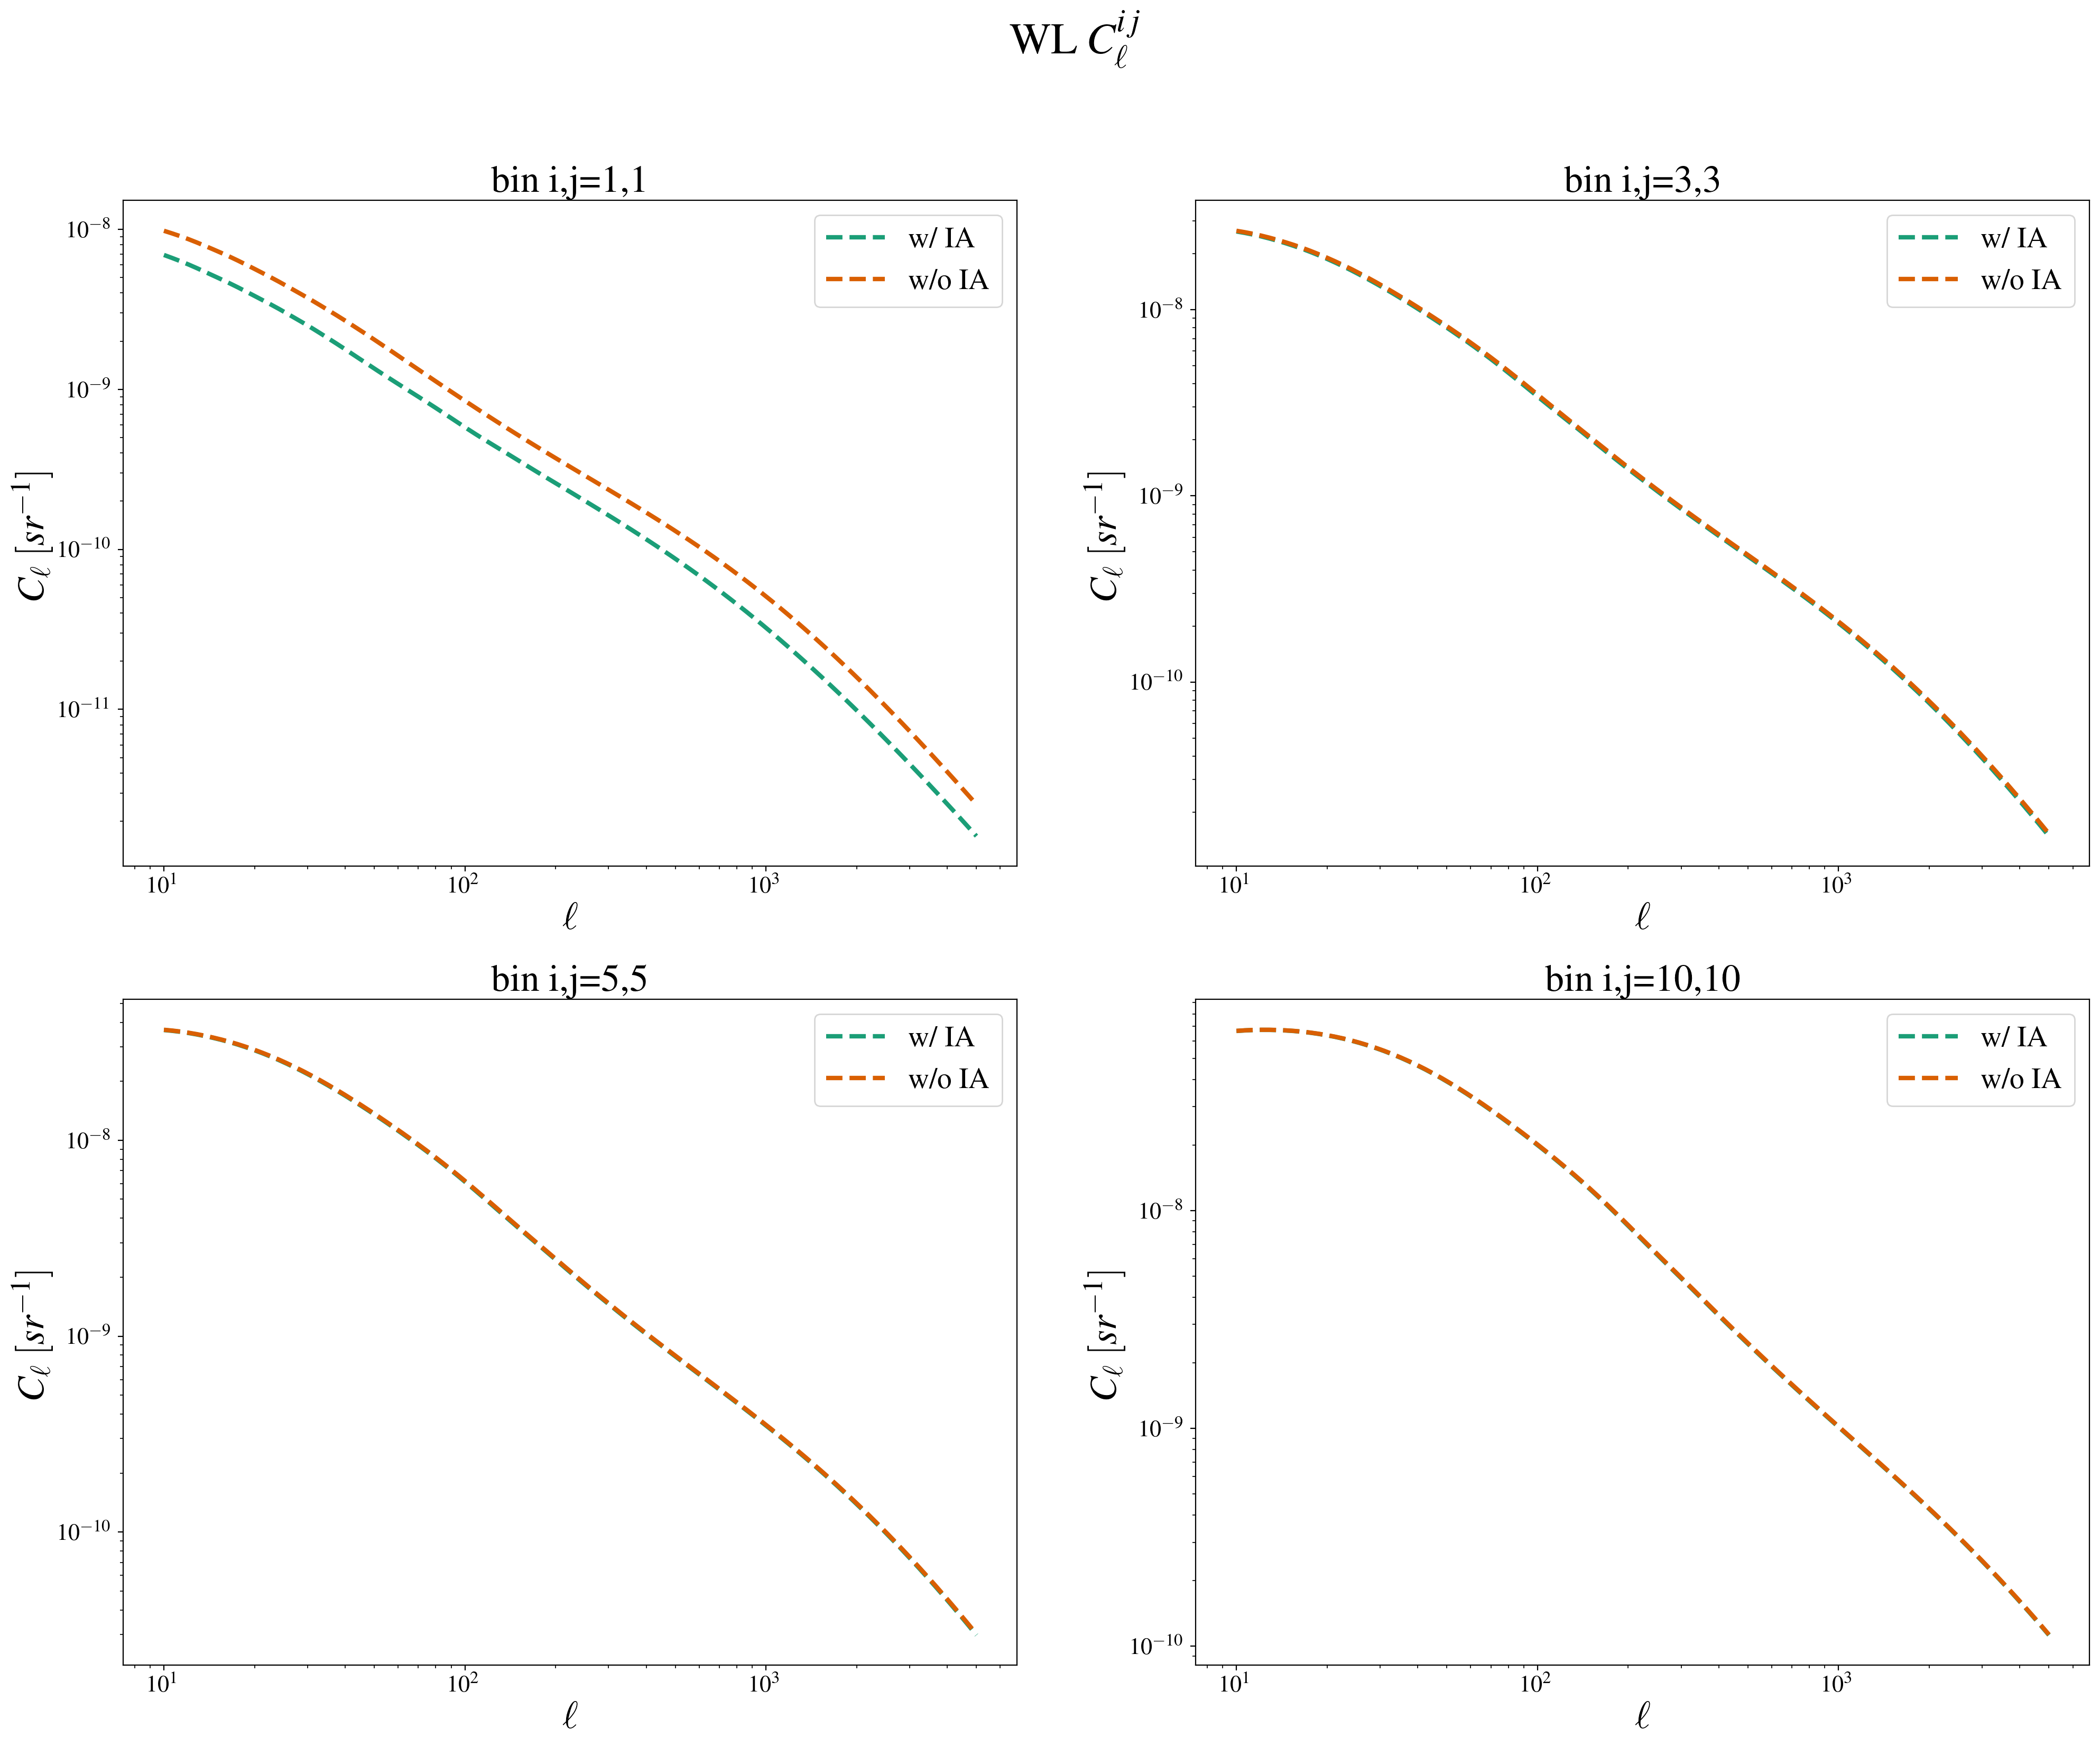

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(24,18), dpi=200)
fig.suptitle(r'WL $C^{ij}_{\ell}$')

iz_dict={1:[0,0], 3:[0,1], 5:[1,0], 10:[1,1]}

for iz in [1,3,5,10]:
    
    ax1 = axs[iz_dict[iz][0],iz_dict[iz][1]]
    
    pl_label_1 = 'w/ IA'
    ax1.loglog(ells, [ClWL_1(cur_ell, iz, iz) for cur_ell in ells], color=colors[0], ls='--', label=pl_label_1, lw=3)
    
    pl_label_2 = 'w/o IA'
    ax1.loglog(ells, [ClWL_2(cur_ell, iz, iz) for cur_ell in ells], color=colors[1], ls='--', label=pl_label_2, lw=3)

    
    ax1.set_xlabel(r'$\ell$', fontsize=26)
    ax1.set_ylabel(r'$C_\ell$ $[sr^{-1}]$', fontsize=26)
    ax1.set_title('bin i,j={:d},{:d}'.format(iz,iz))
    ax1.legend();

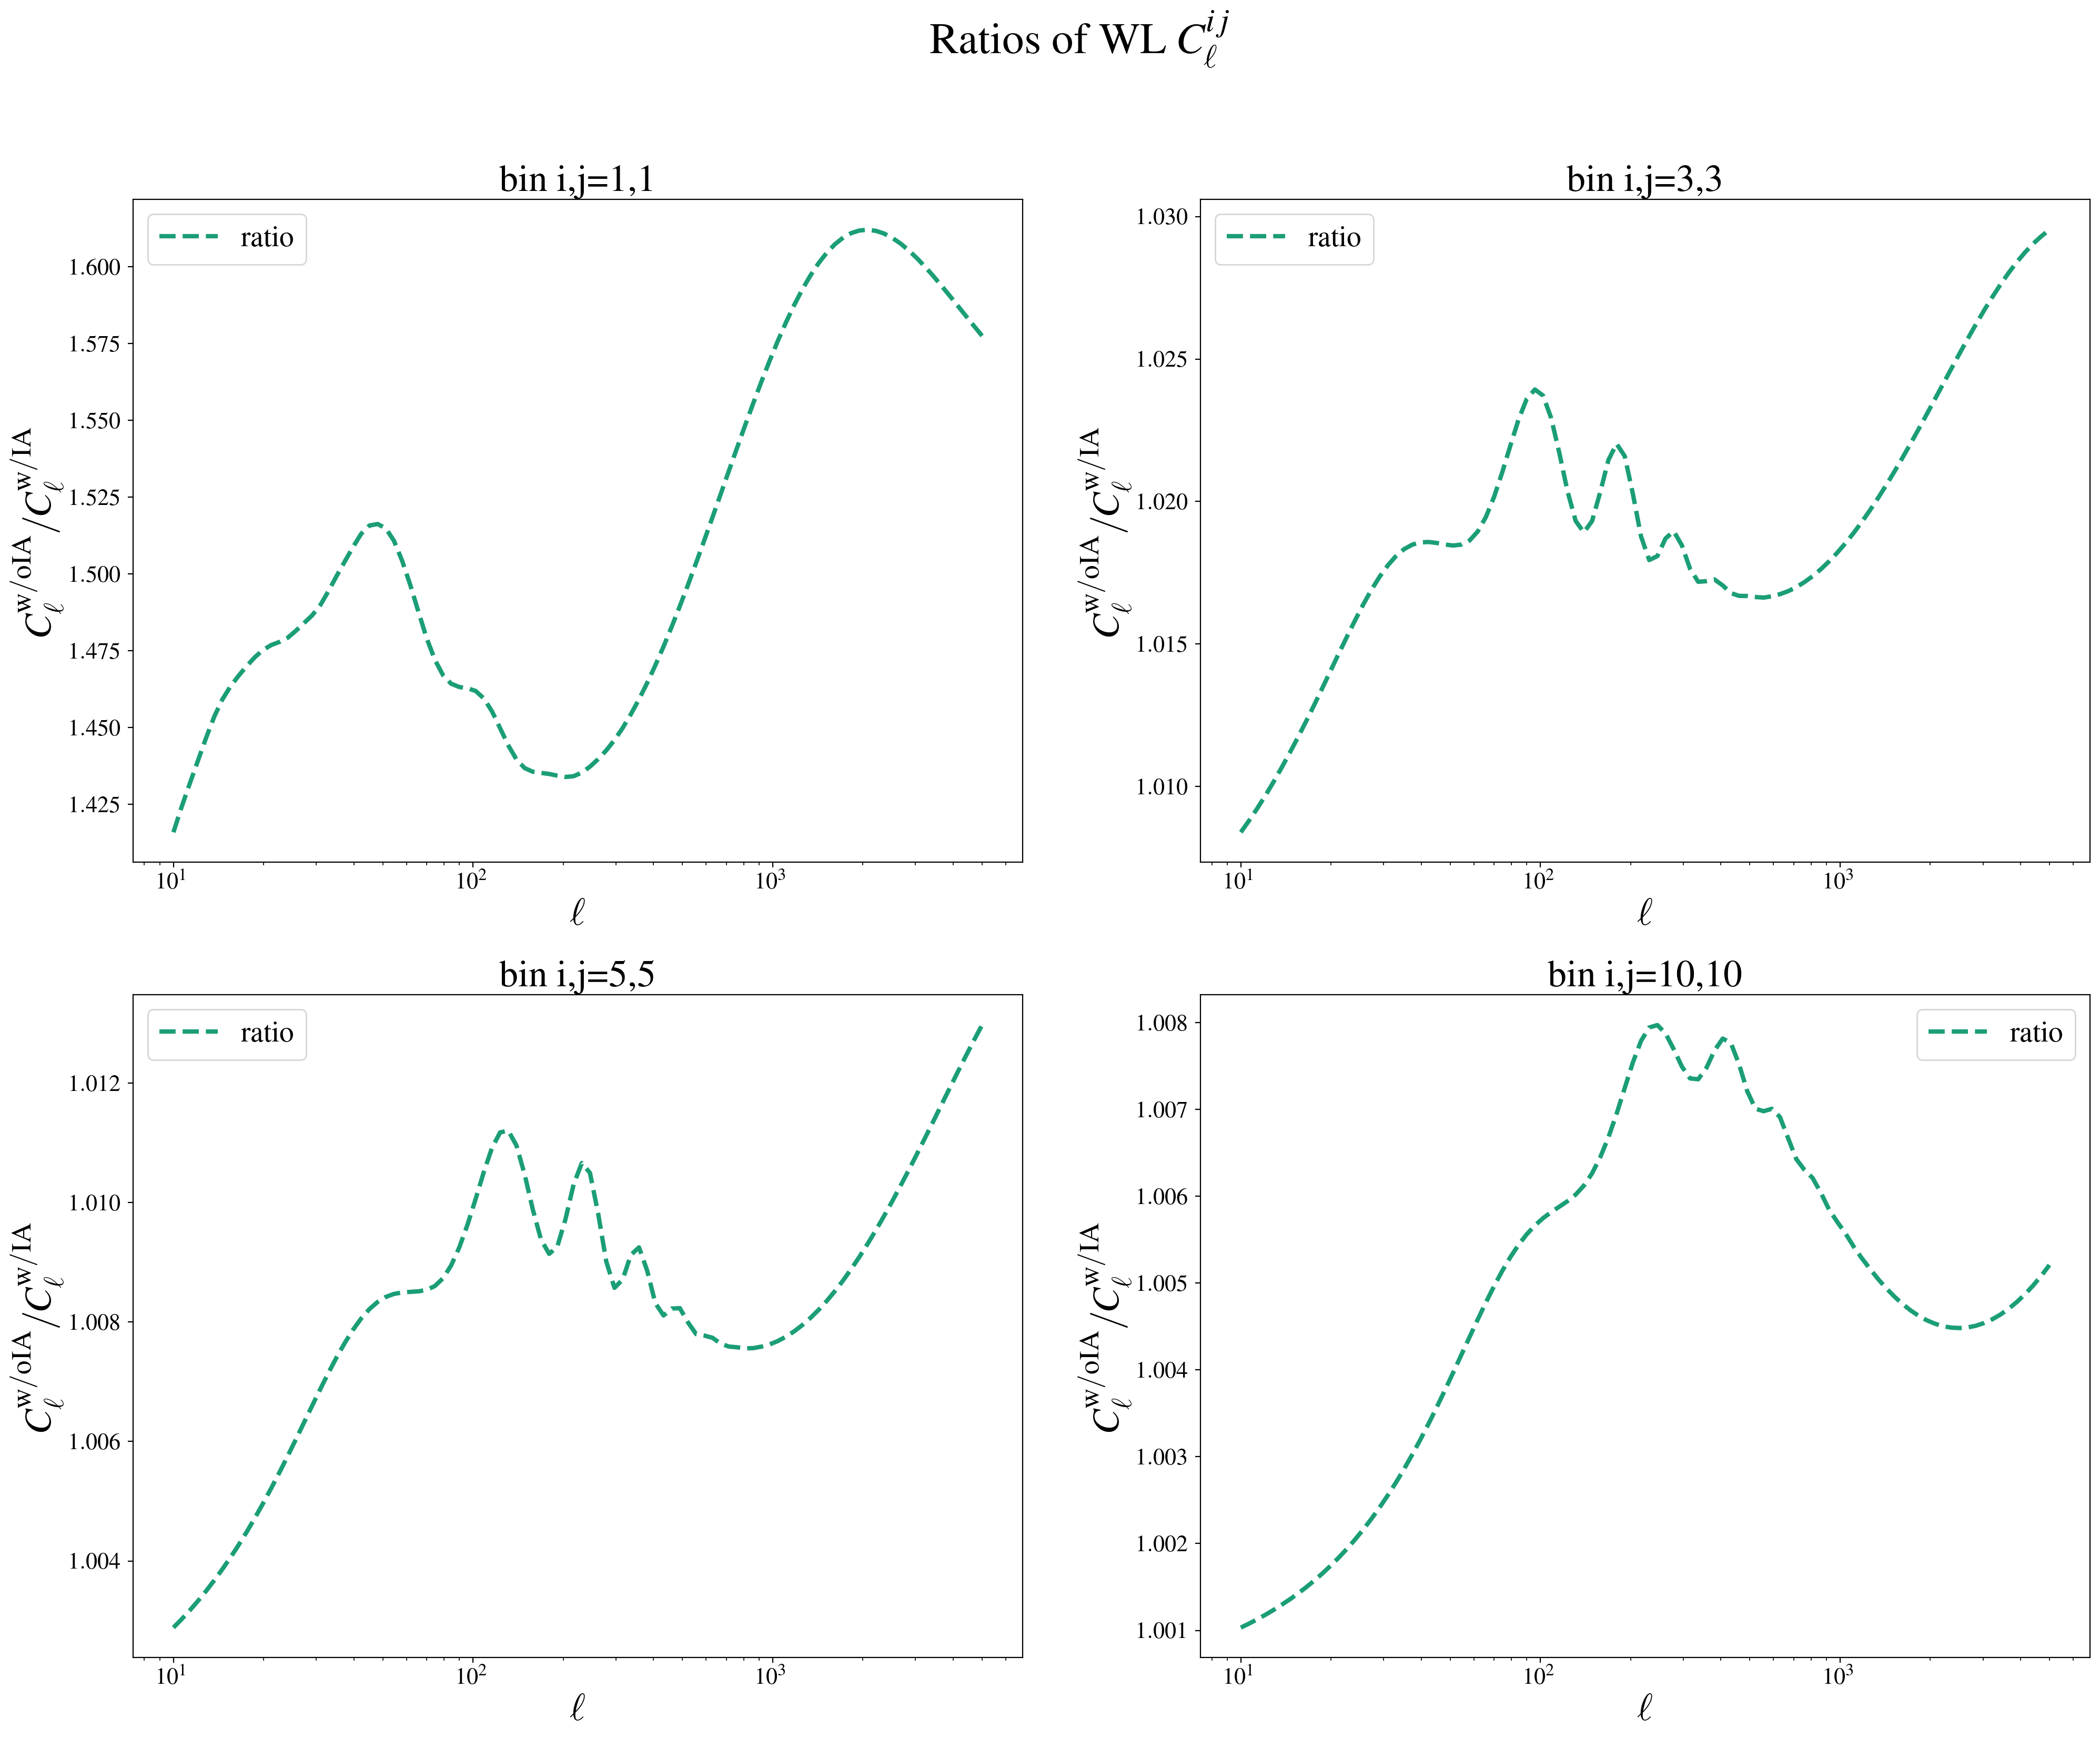

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(24,18), dpi=200)
fig.suptitle(r'Ratios of WL $C^{ij}_{\ell}$')

iz_dict={1:[0,0], 3:[0,1], 5:[1,0], 10:[1,1]}

for iz in [1,3,5,10]:
    
    ax1 = axs[iz_dict[iz][0],iz_dict[iz][1]]
      
    pl_label_2 = 'ratio'
    ax1.semilogx(ells, [ClWL_2(cur_ell, iz, iz)/ClWL_1(cur_ell, iz, iz) for cur_ell in ells], color=colors[0], ls='--', label=pl_label_2, lw=3)
    
    ax1.set_xlabel(r'$\ell$', fontsize=26)
    ax1.set_ylabel(r'$C_\ell^{\rm w/o IA}/C_\ell^{\rm w/ IA}$', fontsize=26)
    ax1.set_title('bin i,j={:d},{:d}'.format(iz,iz))
    ax1.legend();

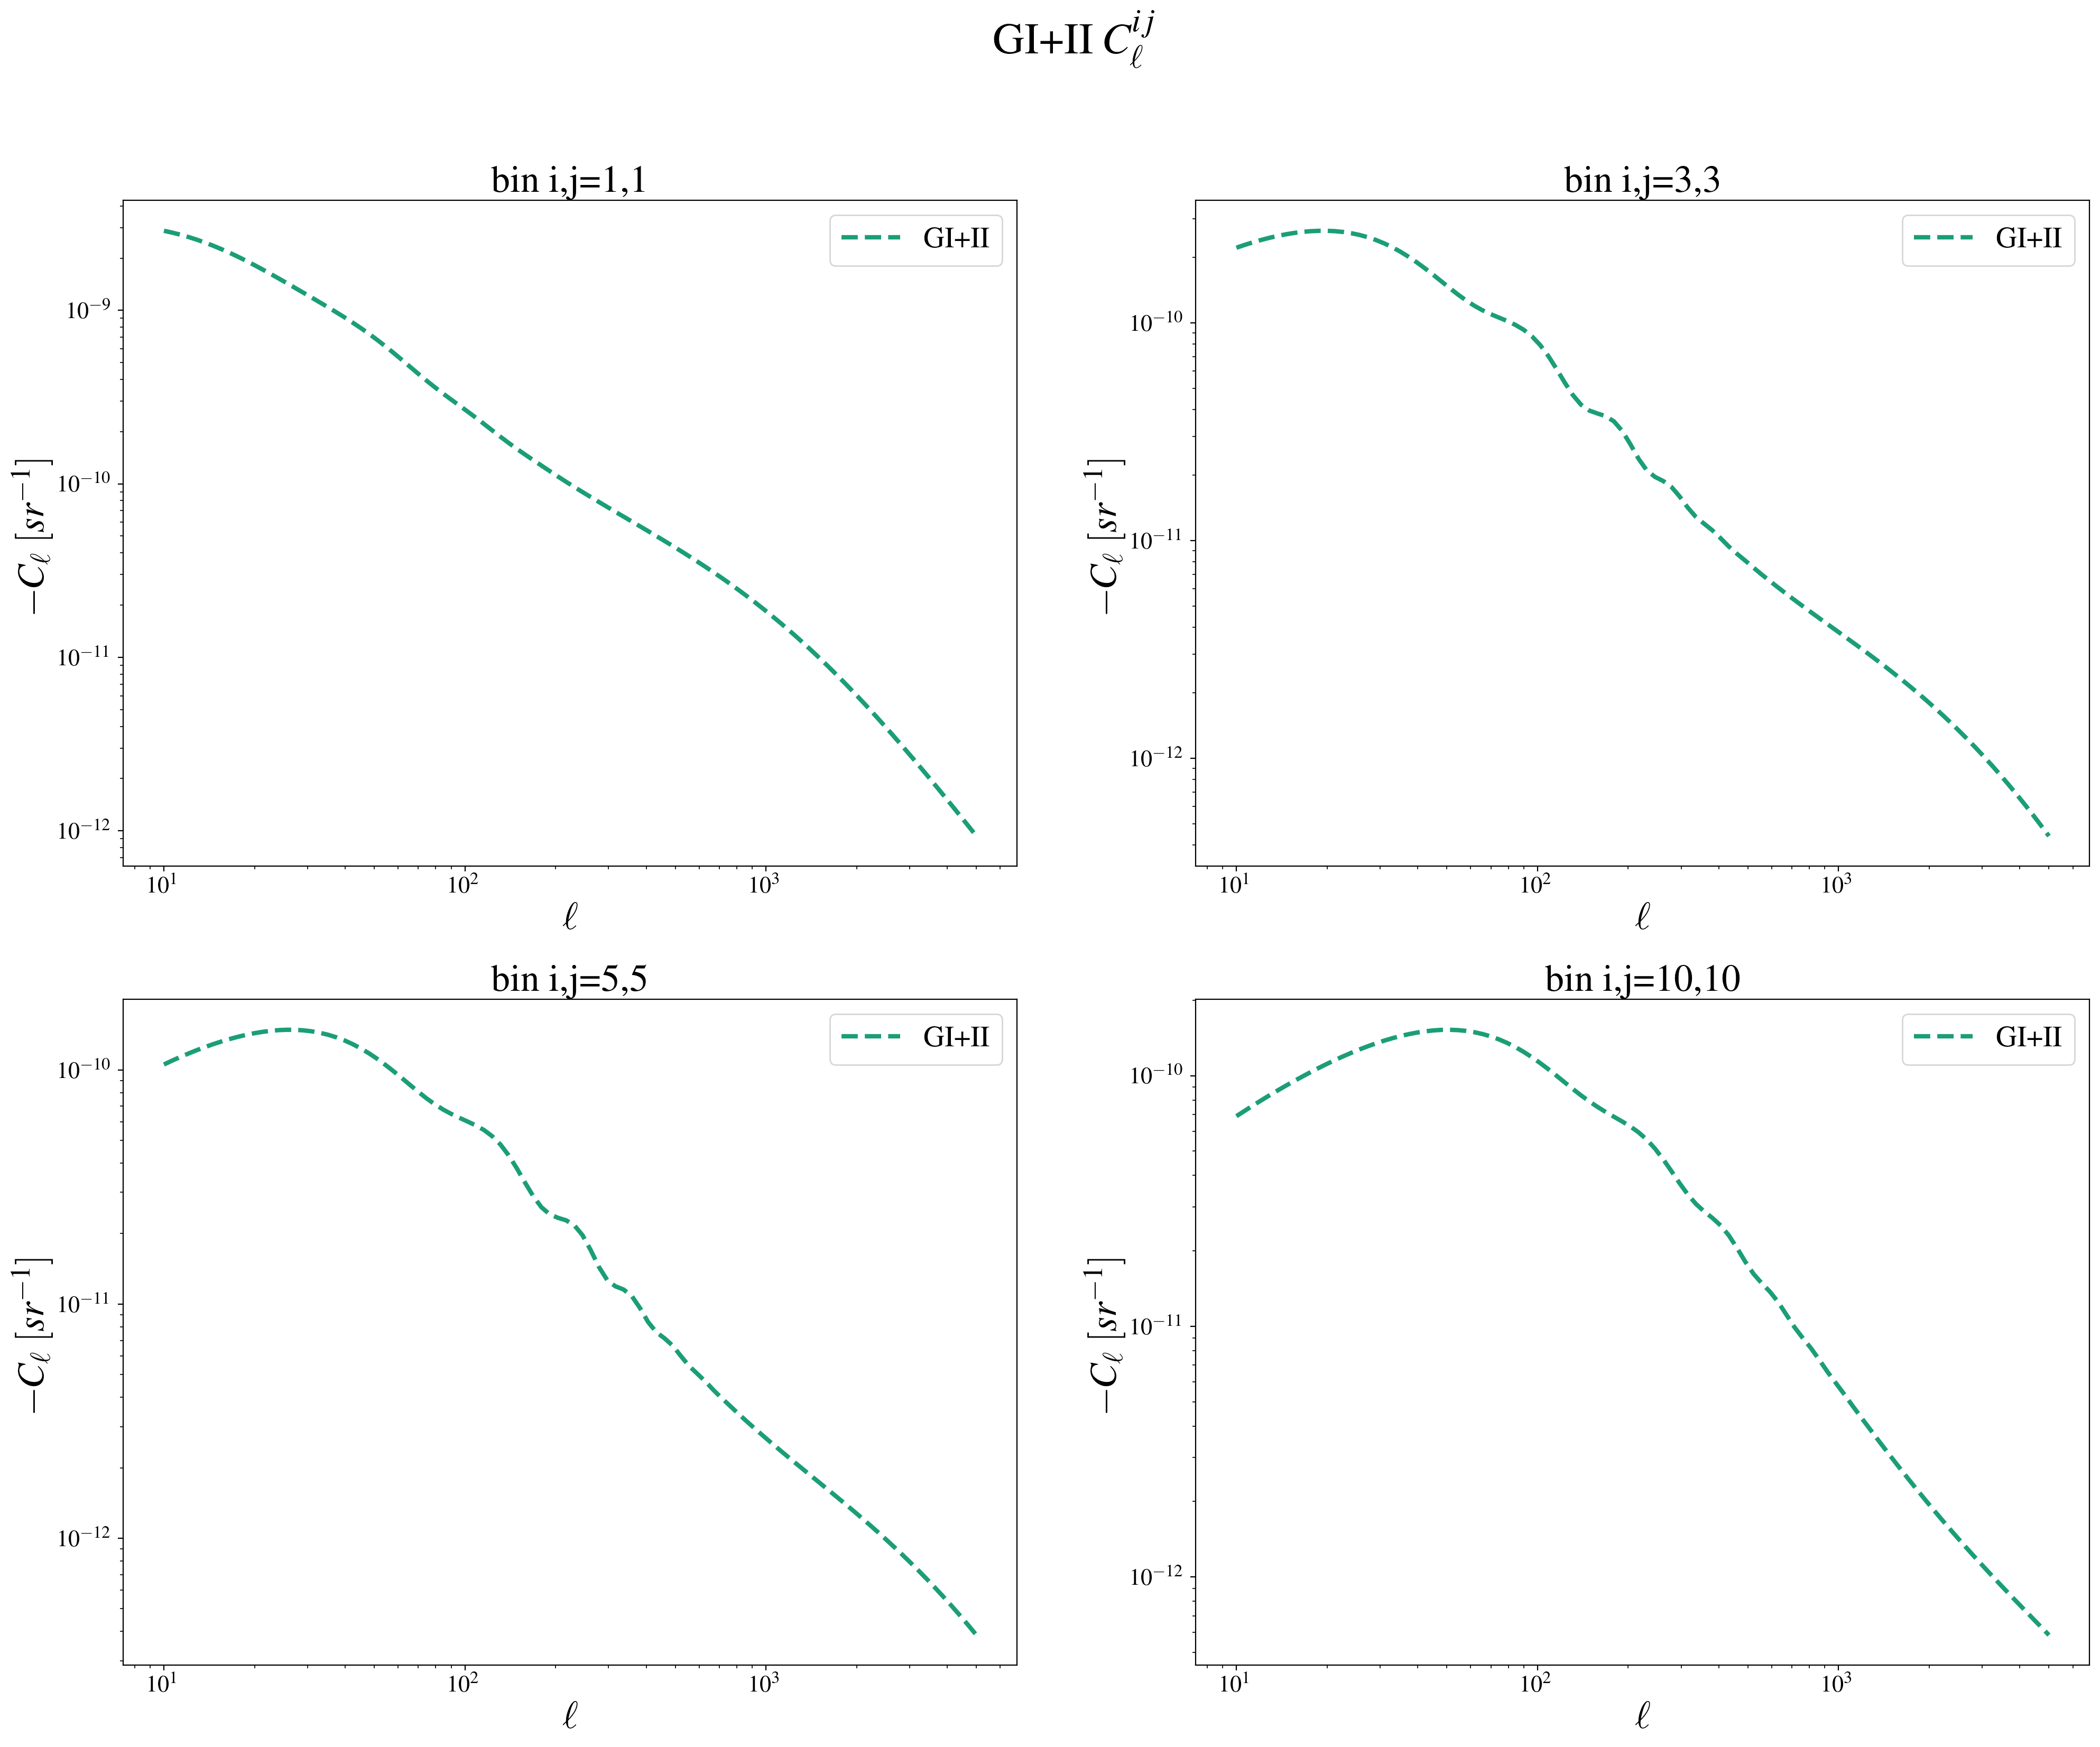

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(24,18), dpi=200)
fig.suptitle(r'GI+II $C^{ij}_{\ell}$')

iz_dict={1:[0,0], 3:[0,1], 5:[1,0], 10:[1,1]}

for iz in [1,3,5,10]:
    
    ax1 = axs[iz_dict[iz][0],iz_dict[iz][1]]
    
    pl_label_1 = 'GI+II'
    ax1.loglog(ells, [-(ClWL_1(cur_ell, iz, iz)-ClWL_2(cur_ell, iz, iz)) for cur_ell in ells], color=colors[0], ls='--', label=pl_label_1, lw=3)

    
    ax1.set_xlabel(r'$\ell$', fontsize=26)
    ax1.set_ylabel(r'$-C_\ell$ $[sr^{-1}]$', fontsize=26)
    ax1.set_title('bin i,j={:d},{:d}'.format(iz,iz))
    ax1.legend();

### Plotting the WL x GC photo Cl's

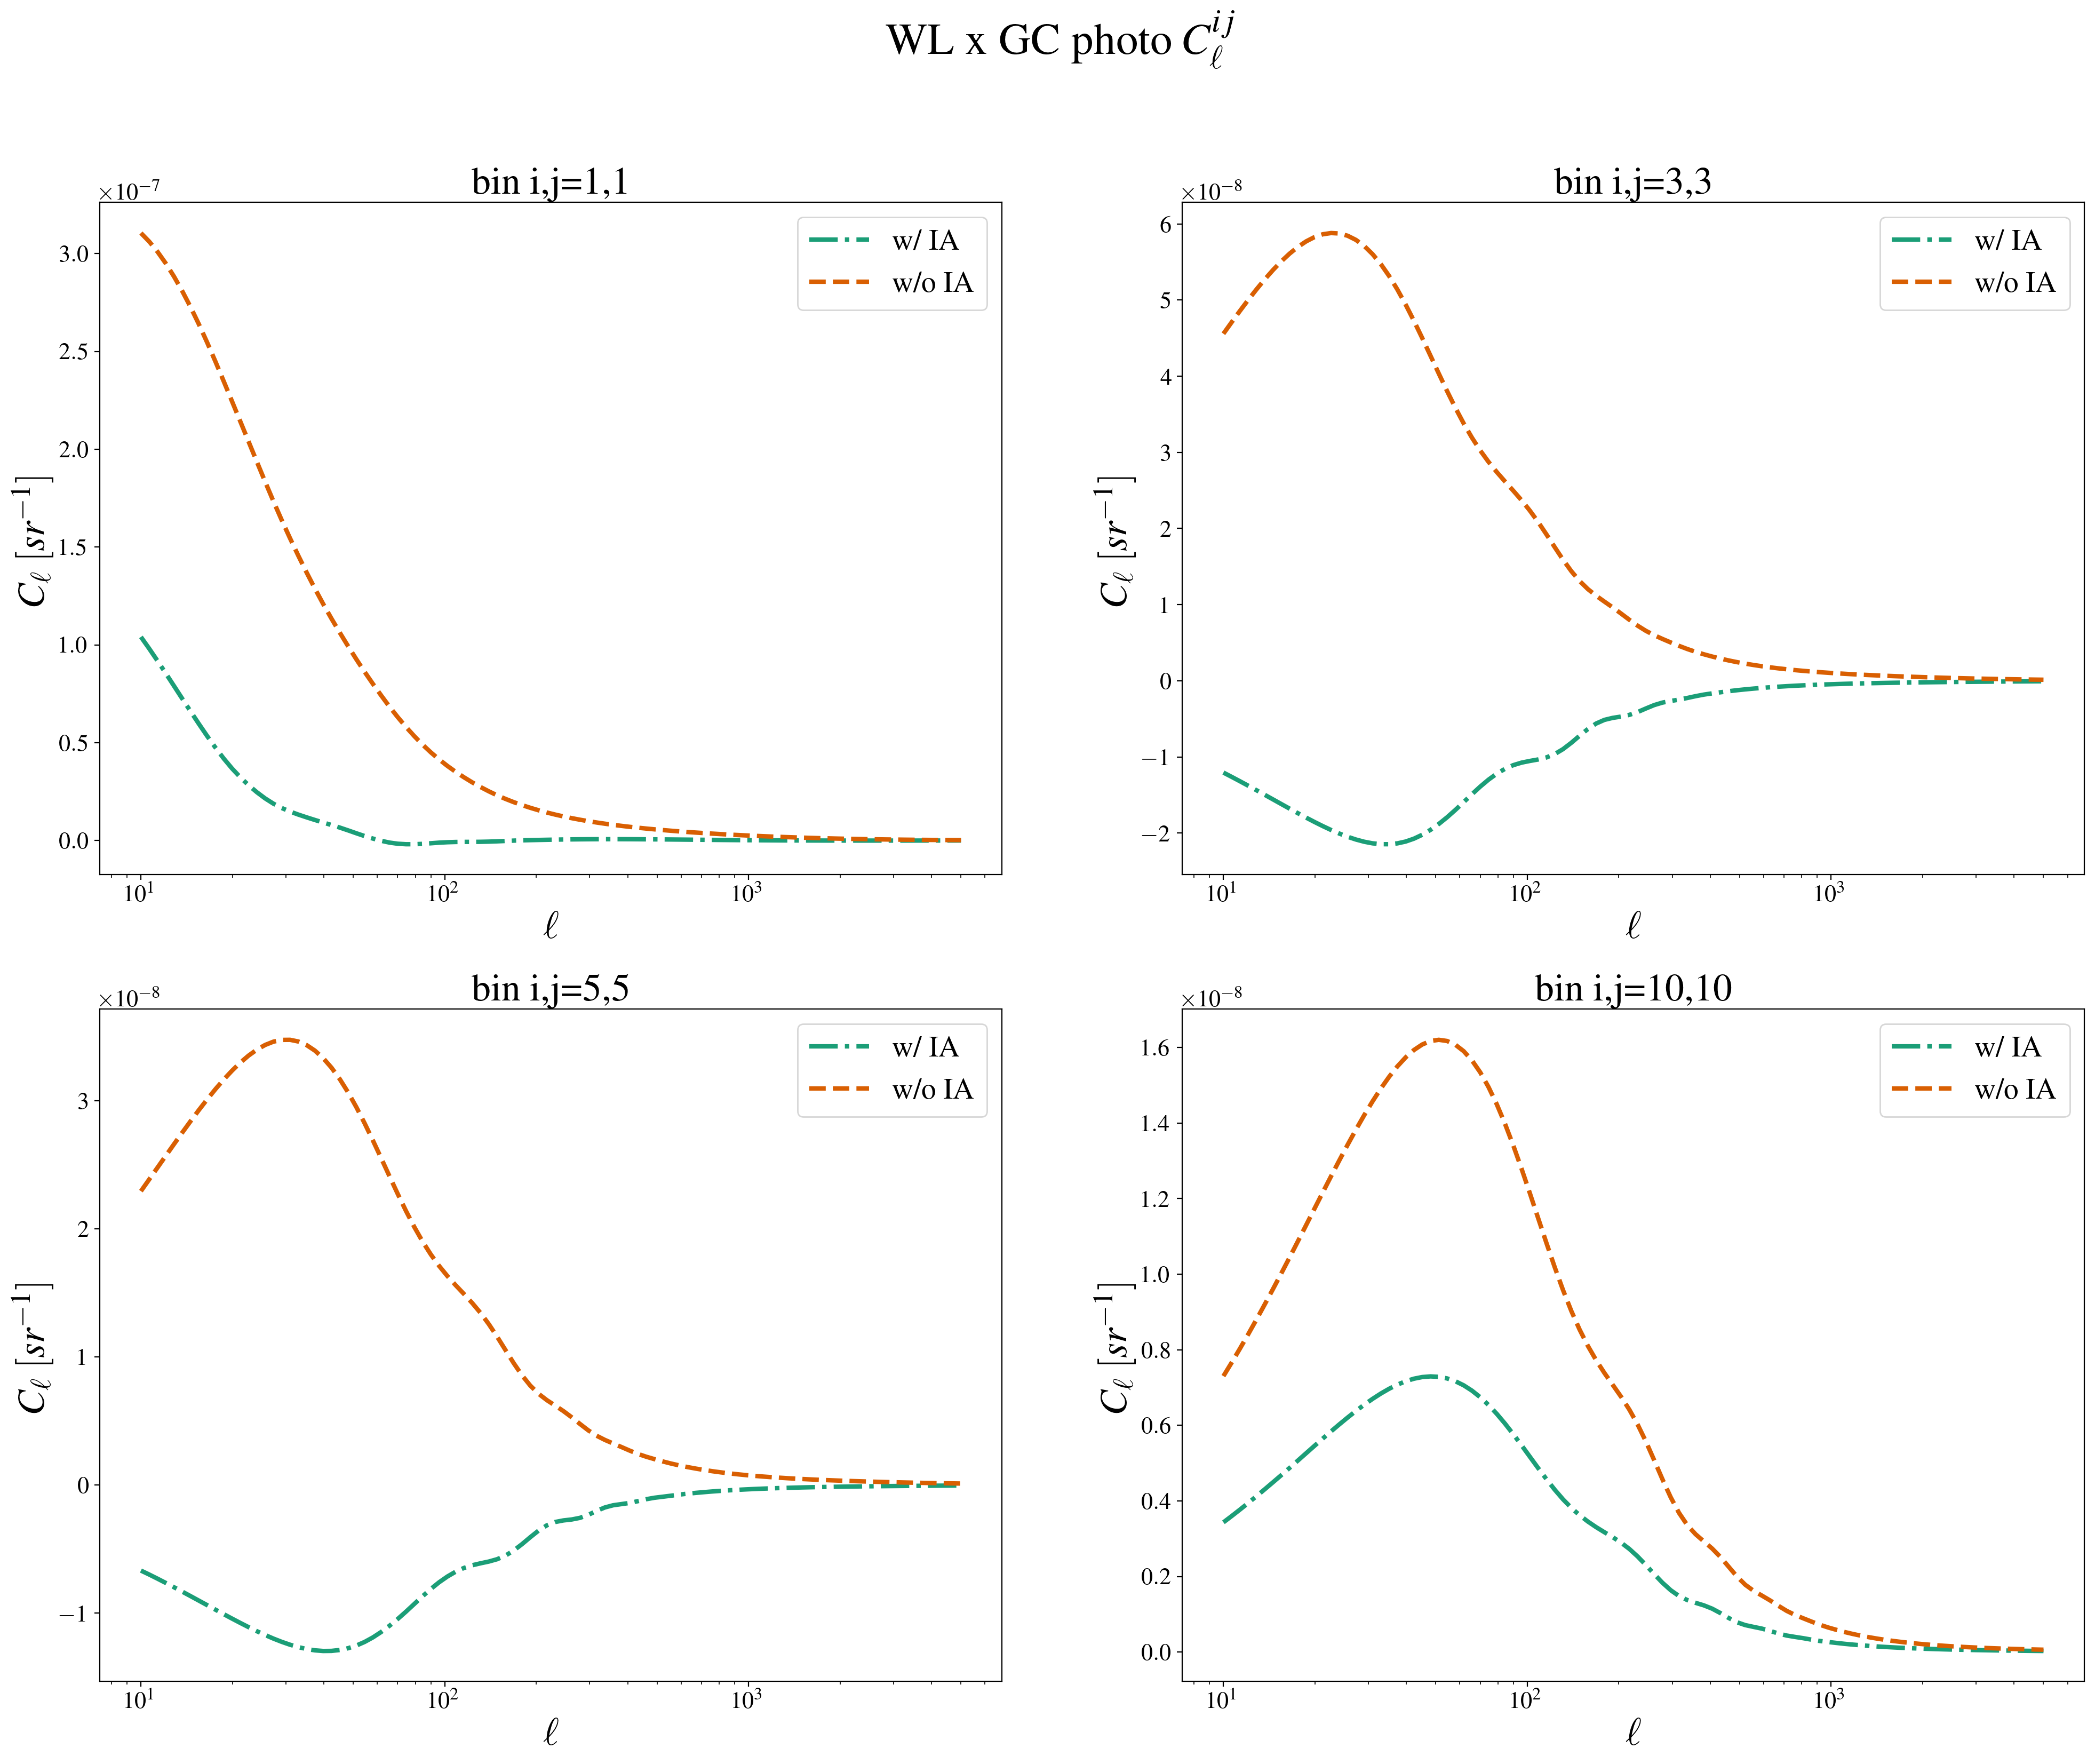

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(24,18), dpi=200)
fig.suptitle(r'WL x GC photo $C^{ij}_{\ell}$')

iz_dict={1:[0,0], 3:[0,1], 5:[1,0], 10:[1,1]}

for iz in [1,3,5,10]:
    
    ax1 = axs[iz_dict[iz][0],iz_dict[iz][1]]

    pl_label_1 = 'w/ IA'
    ax1.semilogx(ells, [ClGCxWL_1(cur_ell, iz, iz) for cur_ell in ells], color=colors[0], ls='-.', label=pl_label_1, lw=3)

    pl_label_2 = 'w/o IA'
    ax1.semilogx(ells, [ClGCxWL_2(cur_ell, iz, iz) for cur_ell in ells], color=colors[1], ls='--', label=pl_label_2, lw=3)
    
    ax1.set_xlabel(r'$\ell$', fontsize=26)
    ax1.set_ylabel(r'$C_\ell$ $[sr^{-1}]$', fontsize=26)
    ax1.set_title('bin i,j={:d},{:d}'.format(iz,iz))
    ax1.legend();

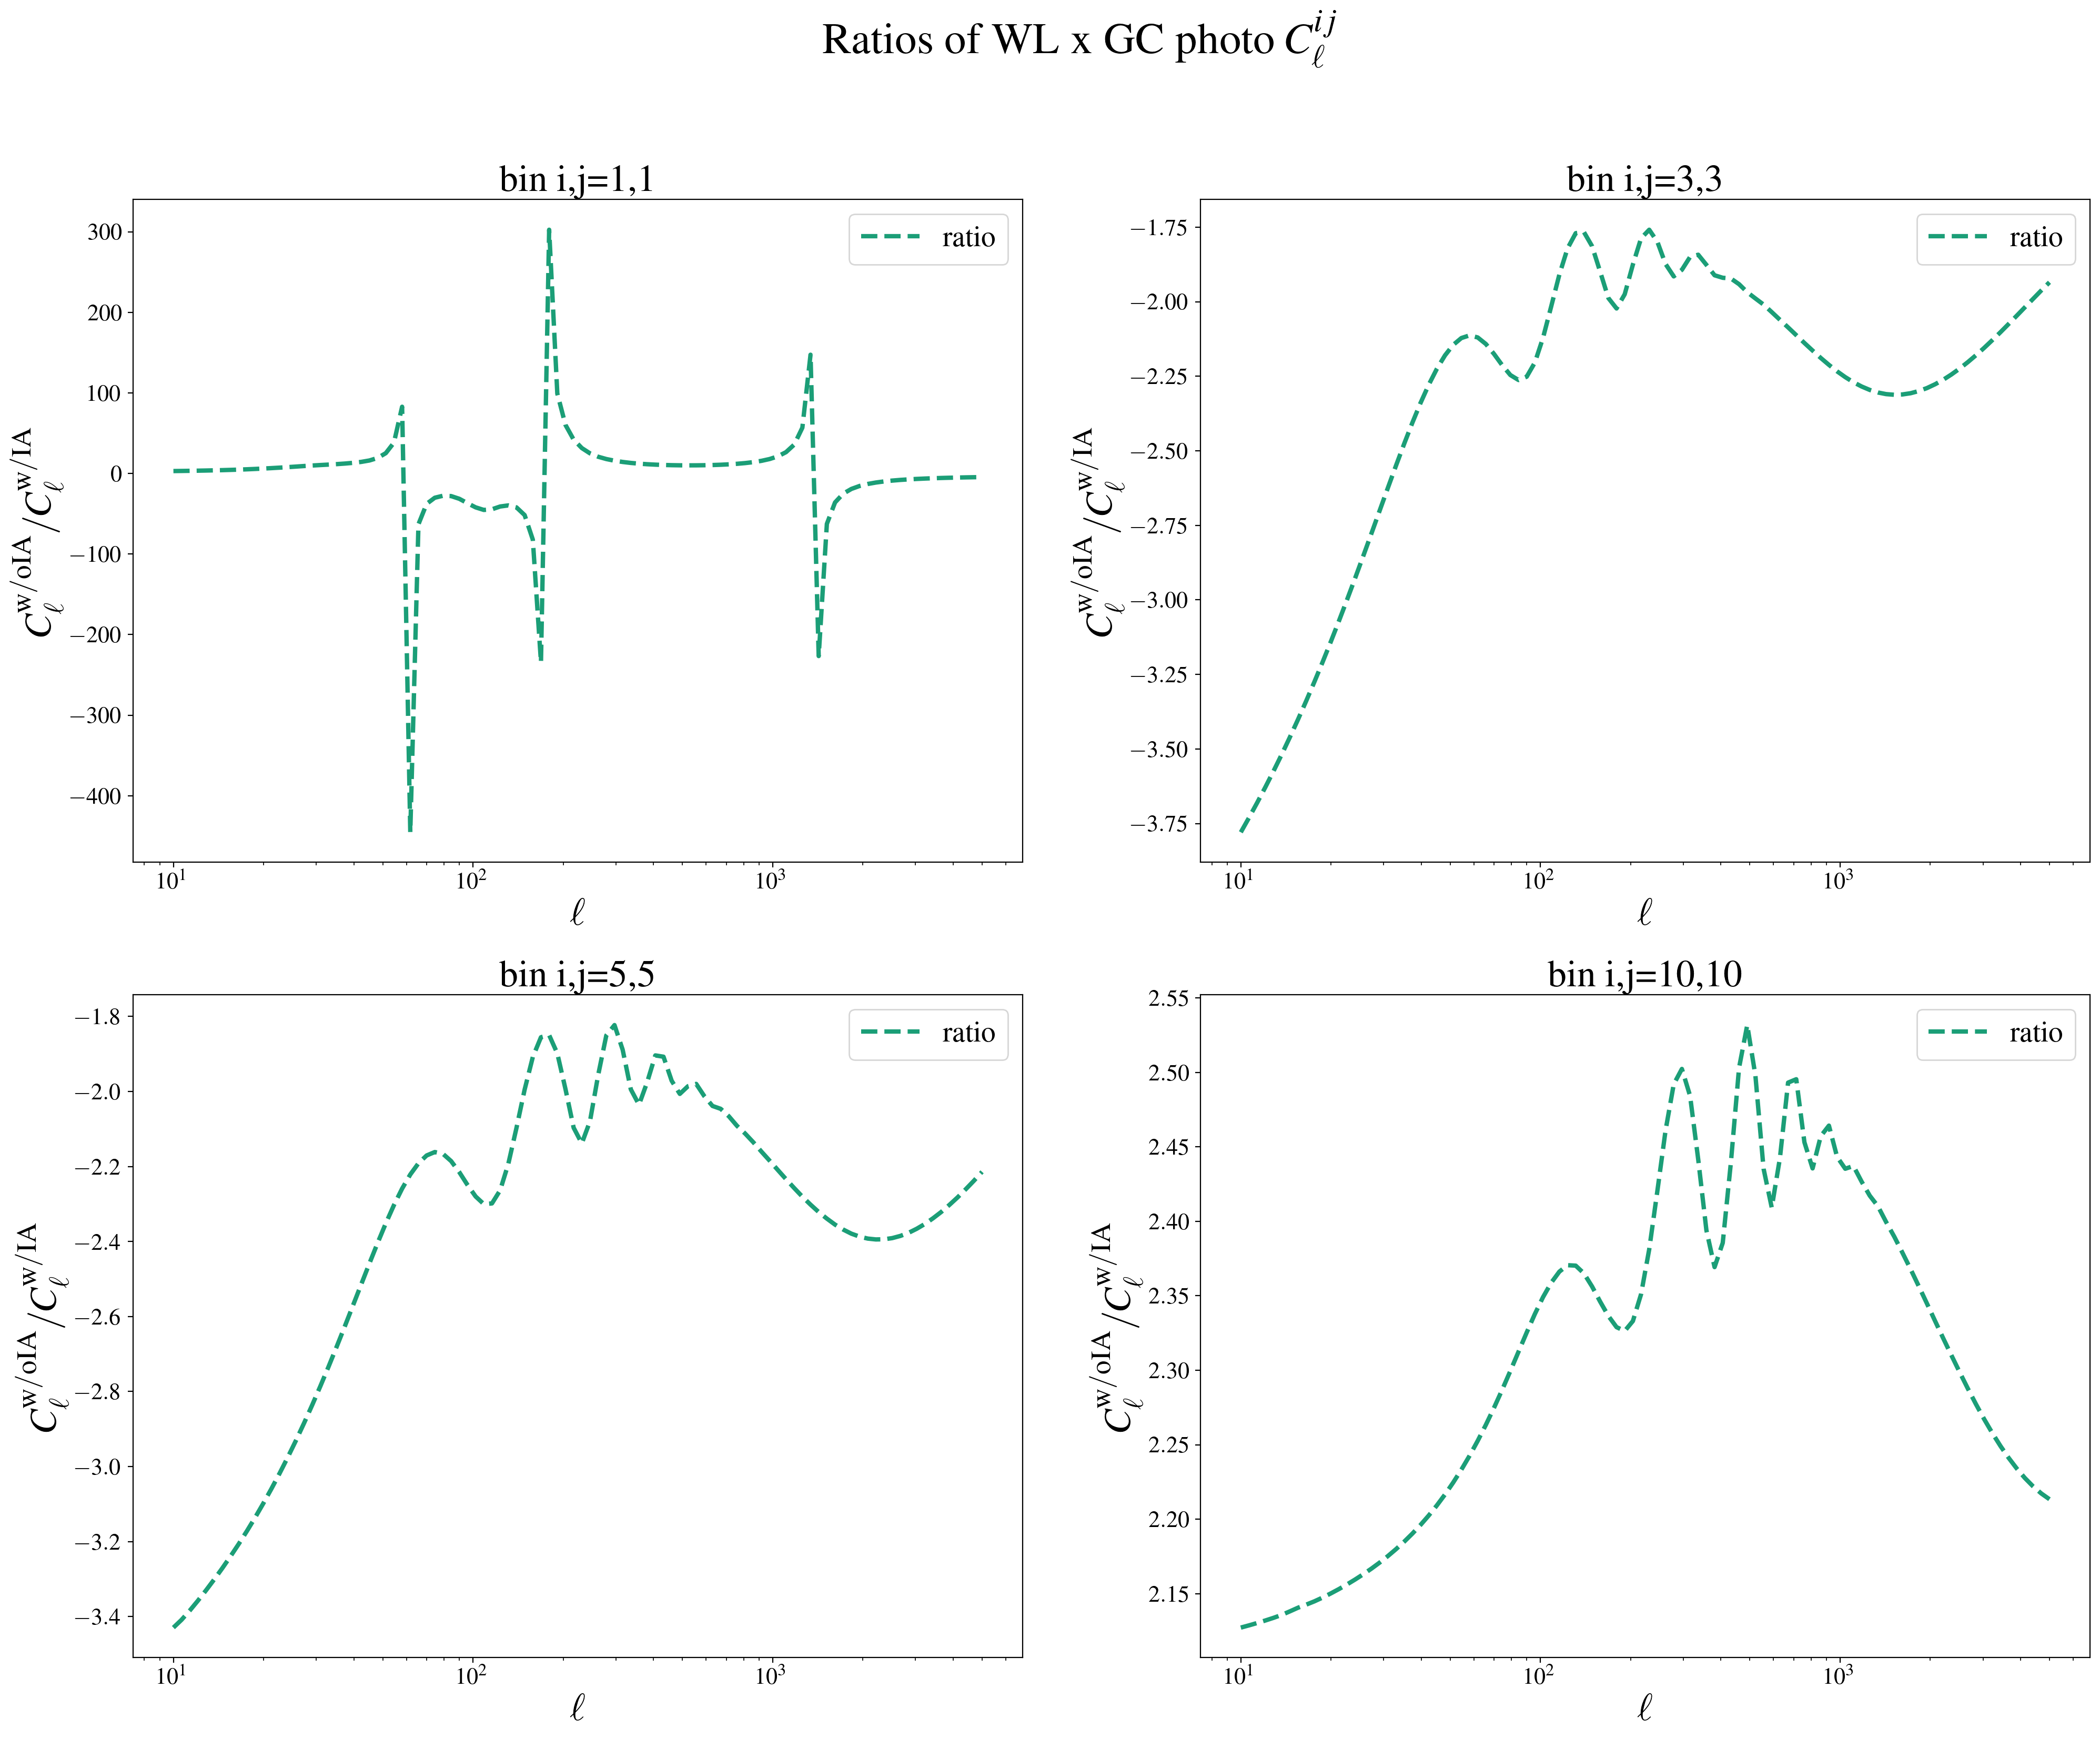

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(24,18), dpi=200)
fig.suptitle(r'Ratios of WL x GC photo $C^{ij}_{\ell}$')

iz_dict={1:[0,0], 3:[0,1], 5:[1,0], 10:[1,1]}

for iz in [1,3,5,10]:
    
    ax1 = axs[iz_dict[iz][0],iz_dict[iz][1]]

    pl_label_2 = 'ratio'
    ax1.semilogx(ells, [ClGCxWL_2(cur_ell, iz, iz)/ClGCxWL_1(cur_ell, iz, iz) for cur_ell in ells], color=colors[0], ls='--', label=pl_label_2, lw=3)
    
    ax1.set_xlabel(r'$\ell$', fontsize=26)
    ax1.set_ylabel(r'$C_\ell^{\rm w/o IA}/C_\ell^{\rm w/ IA}$', fontsize=26)
    ax1.set_title('bin i,j={:d},{:d}'.format(iz,iz))
    ax1.legend();

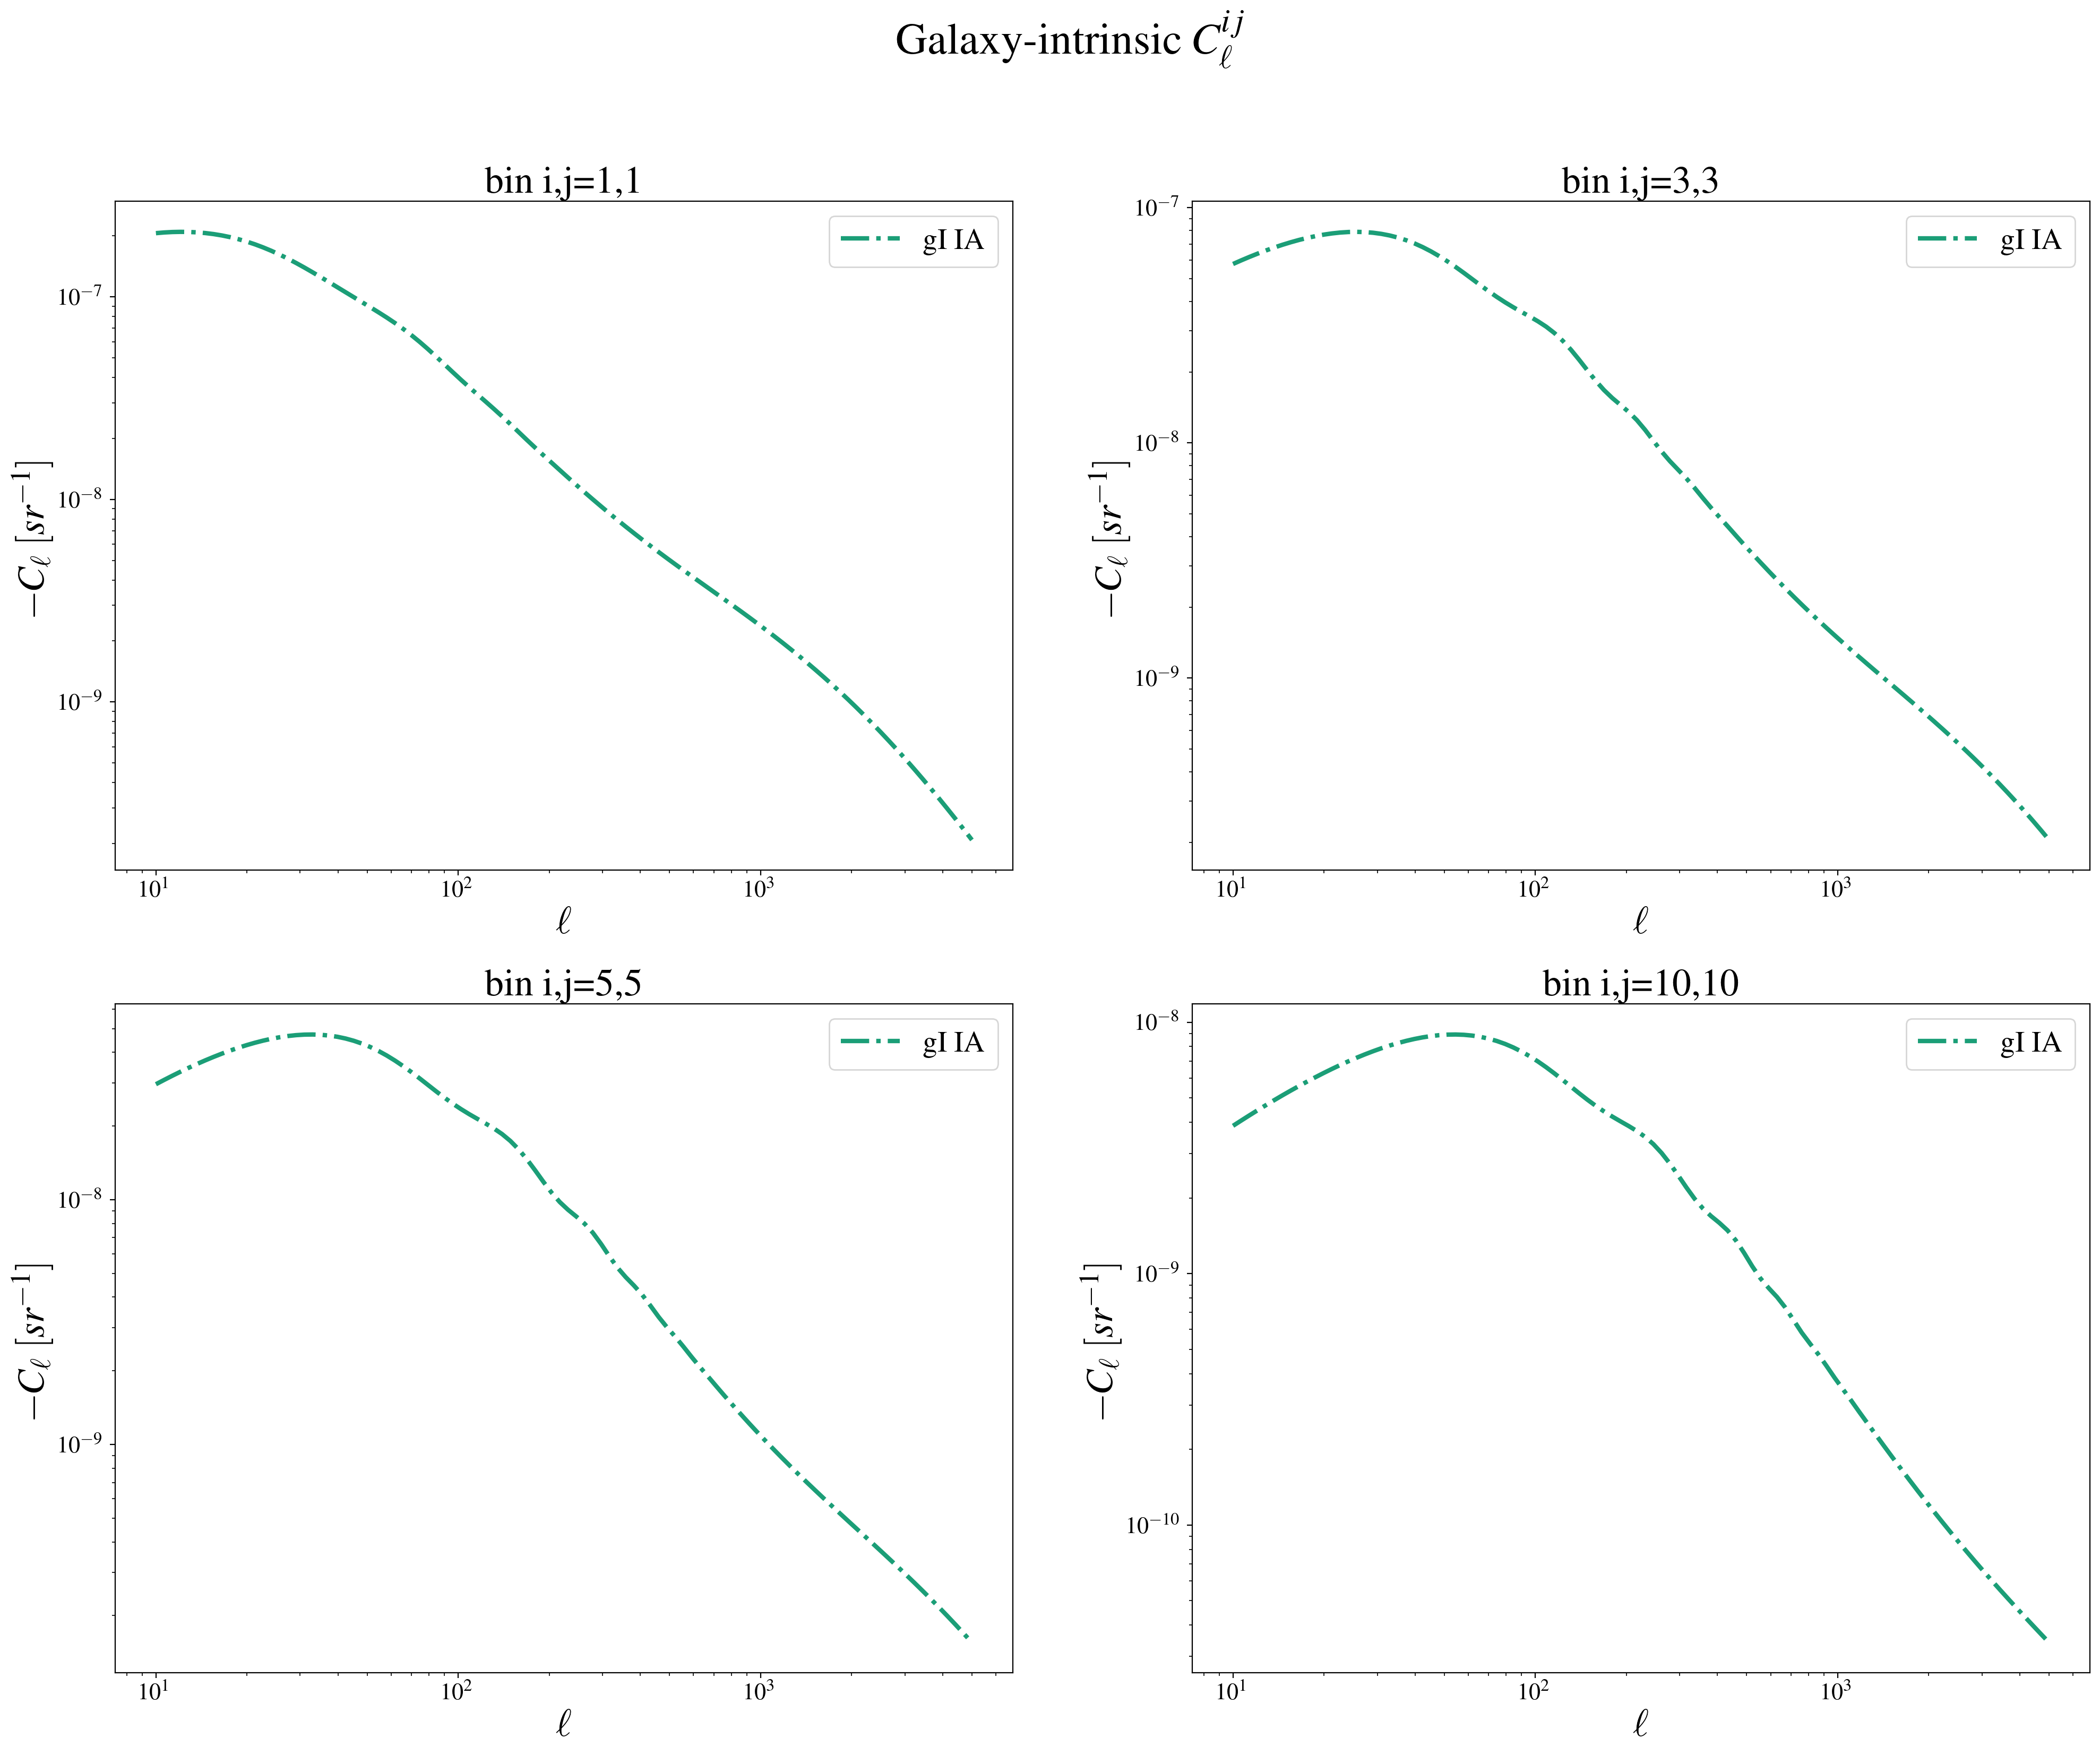

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(24,18), dpi=200)
fig.suptitle(r'Galaxy-intrinsic $C^{ij}_{\ell}$')

iz_dict={1:[0,0], 3:[0,1], 5:[1,0], 10:[1,1]}

for iz in [1,3,5,10]:
    
    ax1 = axs[iz_dict[iz][0],iz_dict[iz][1]]

    pl_label_1 = 'gI IA'
    ax1.loglog(ells, [-(ClGCxWL_1(cur_ell, iz, iz)-ClGCxWL_2(cur_ell, iz, iz)) for cur_ell in ells], color=colors[0], ls='-.', label=pl_label_1, lw=3)
    
    ax1.set_xlabel(r'$\ell$', fontsize=26)
    ax1.set_ylabel(r'$-C_\ell$ $[sr^{-1}]$', fontsize=26)
    ax1.set_title('bin i,j={:d},{:d}'.format(iz,iz))
    ax1.legend();